## Dependency analysis

This notebook contains analysis of dependencies in Common Criteria certificates.


### Attention: All these analytics were computed on dataset from 2022-04-16

### Observations of the dependency analysis
- 3331 certificates are archived
- 1645 certificates are active 
- 3767 certificates referencing no other certificates: directly_affecting == Nan && indirectly_affecting == NaN
- 433 certificates are referenced by at least one archived certificate
- 16 out of total 936 BSI certificates reference at least one ANSSI certificate
- 214 out of total 725 ANSSI certificates reference at least one BSI certificate
- Certificates with specified EAL tend to reference certificates with same or higher EAL 
- Certificates with specified category are more likely to reference certificates in the same category
- Most common EAL in smart cards is EAL5+, lowest is EAL1+ and highest is EAL7
- BSI lab self-reference its certificates much more than products certified by other labs
- Germany scheme self-reference itself in comparison to referencing other scheme


#### Active certificates referencing at least one archived
Out of 1506 active certificates, 422 are referencing at least 1 certificate
Out of 422 referencing cert, 138 are referencing at least 1 already archived certificate


#### NSCIB + ANSSI + BSI
BSI: total of 936 records, 592 certificates reference at least one certificate
Out of 592 certificates 16 reference at least 1 ANSSI certificate
Out of 592 certificates 16 reference at least 1 NSCIB certificate

ANSSI: total of 725 records, 459 certificates reference at least one certificate
Out of 459 certificates 214 reference at least 1 BSI certificate
Out of 459 certificates 20 reference at least 1 NSCIB certificate

NSCIB: total of 182 records, 98 certificate reference at least one certificate
Out of 98 certificates 30 reference at least 1 BSI certificate
Out of 98 certificates 19 reference at least 1 ANSSI certificate


#### Cross References

- 26 pairs of certificates are crossed referenced

{'BSI-DSZ-CC-1033-V2-2021', 'BSI-DSZ-CC-1034-V2-2021'},  
{'BSI-DSZ-CC-1033-2019', 'BSI-DSZ-CC-1034-2019'},  
{'BSI-DSZ-CC-0996-2018', 'BSI-DSZ-CC-0995-2018'},   
{'BSI-DSZ-CC-0808-V3-2017', 'BSI-DSZ-CC-0809-V3-2017'},  
{'BSI-DSZ-CC-0913-2014', 'BSI-DSZ-CC-0911-2014'},  
{'BSI-DSZ-CC-0913-2014', 'BSI-DSZ-CC-0912-2014'},  
{'BSI-DSZ-CC-0913-2014', 'BSI-DSZ-CC-0914-2014'},   
{'BSI-DSZ-CC-0912-2014', 'BSI-DSZ-CC-0911-2014'},  
{'BSI-DSZ-CC-0914-2014', 'BSI-DSZ-CC-0911-2014'},  
{'BSI-DSZ-CC-0914-2014', 'BSI-DSZ-CC-0912-2014'},  
{'BSI-DSZ-CC-0895-2014', 'BSI-DSZ-CC-0894-2014'},  
{'BSI-DSZ-CC-1073-2019', 'BSI-DSZ-CC-1074-2019'},  
{'BSI-DSZ-CC-0808-V2-2016', 'BSI-DSZ-CC-0809-V2-2016'},  
{'BSI-DSZ-CC-0893-2014', 'BSI-DSZ-CC-0892-2014'},  
{'BSI-DSZ-CC-0851-2013', 'BSI-DSZ-CC-0850-2013'},  
{'BSI-DSZ-CC-0808-2013', 'BSI-DSZ-CC-0809-2013'},  
{'BSI-DSZ-CC-0885-2013', 'BSI-DSZ-CC-0886-2013'},  
{'BSI-DSZ-CC-0760-2013', 'BSI-DSZ-CC-0761-2013'},  
{'BSI-DSZ-CC-0762-2012', 'BSI-DSZ-CC-0763-2012'},  
{'BSI-DSZ-CC-0798-2012', 'BSI-DSZ-CC-0797-2012'},  
{'BSI-DSZ-CC-0798-2012', 'BSI-DSZ-CC-0799-2012'},  
{'BSI-DSZ-CC-0798-2012', 'BSI-DSZ-CC-0804-2012'},  
{'BSI-DSZ-CC-0797-2012', 'BSI-DSZ-CC-0799-2012'},  
{'BSI-DSZ-CC-0797-2012', 'BSI-DSZ-CC-0804-2012'},  
{'BSI-DSZ-CC-0804-2012', 'BSI-DSZ-CC-0799-2012'},  
{'BSI-DSZ-CC-0346-2006', 'BSI-DSZ-CC-0347-2006'}  

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections 
import datetime
import graphviz
import plotly.express as px
import plotly.graph_objects as go

from sec_certs.dataset.common_criteria import CCDataset
from typing import Tuple, List

plt.style.use("ggplot")

## Data Analysis Utilities

In [3]:
def plot_graphviz_graph(title, filename, nodes, data_dict):
    graph = graphviz.Digraph(comment=title)
    
    # Creation of nodes
    for node in nodes:
        graph.node(node, node)
        
    # Edges among nodes
    for node, references_dict in data_dict.items():
        for referenced_node in references_dict:
            if referenced_node is None:
                continue
            graph.edge(node, referenced_node, label=str(references_dict[referenced_node]))
    
    # Rendering graph to pdf file
    graph.render(format="pdf", filename=filename)
    
    print(f"{filename} has been rendered successfully")

In [4]:
dset = CCDataset.from_web_latest()
dset._compute_dependencies()
df = dset.to_pandas()

print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 4976 rows and 21 columns.


In [5]:
df.head()

cert_id  \
dgst                              
8298c7814b3b2860  KECS-CR-22-11   
9a1c767d358eee50            NaN   
979e00ac7d3e229c  KECS-CR-21-63   
a6015339aa4434cf  KECS-CR-21-52   
a89ee15539d006d1    CSEC2019015   

                                                               name  status  \
dgst                                                                          
8298c7814b3b2860                                   KSignAccess V4.1  active   
9a1c767d358eee50    VeroGuard HSM Digital ID for Open Networks v1.0  active   
979e00ac7d3e229c                                  SafeIdentity v5.1  active   
a6015339aa4434cf                                     Bandi SSO v7.0  active   
a89ee15539d006d1  DriveLock Agent 2019.2 (Device and Application...  active   

                                            category  \
dgst                                                   
8298c7814b3b2860  Access Control Devices and Systems   
9a1c767d358eee50  Access Control Devices and Systems   
979e00ac7d3e229c  Access Control Devices and Systems   
a6015339aa4434cf  Access Control Devices and Systems   
a89ee15539d006d1  Access Control Devices and Systems   

                               manufacturer scheme cert_lab  \
dgst                                                          
8298c7814b3b2860            KSign Co., LTD.     KR      NaN   
9a1c767d358eee50  VeroGuard Systems Pty Ltd     AU      NaN   
979e00ac7d3e229c           Hancom With Inc.     KR      NaN   
a6015339aa4434cf                    Bandi S     KR      NaN   
a89ee15539d006d1               DriveLock SE     SE      NaN   

                      security_level not_valid_before not_valid_after  ...  \
dgst                                                                   ...   
8298c7814b3b2860                  {}       2022-03-30      2027-03-30  ...   
9a1c767d358eee50  {ALC_FLR.1, EAL2+}       2022-02-23      2027-02-23  ...   
979e00ac7d3e229c                  {}       2021-11-05      2026-11-05  ...   
a6015339aa4434cf                  {}       2021-09-08      2026-09-08  ...   
a89ee15539d006d1   {EAL3, ALC_FLR.3}       2021-04-07      2026-04-07  ...   

                                                            st_link  \
dgst                                                                  
8298c7814b3b2860  https://www.commoncriteriaportal.org/files/epf...   
9a1c767d358eee50  https://www.commoncriteriaportal.org/files/epf...   
979e00ac7d3e229c  https://www.commoncriteriaportal.org/files/epf...   
a6015339aa4434cf  https://www.commoncriteriaportal.org/files/epf...   
a89ee15539d006d1  https://www.commoncriteriaportal.org/files/epf...   

                               manufacturer_web extracted_versions  \
dgst                                                                 
8298c7814b3b2860                            NaN              {4.1}   
9a1c767d358eee50  https://www.veroguard.com.au/              {1.0}   
979e00ac7d3e229c     https://www.hsecure.co.kr/              {5.1}   
a6015339aa4434cf       https://www.bandisnc.com              {7.0}   
a89ee15539d006d1     https://www.drivelock.com/           {2019.2}   

                 cpe_matches verified_cpe_matches  related_cves  \
dgst                                                              
8298c7814b3b2860         NaN                  NaN           NaN   
9a1c767d358eee50         NaN                  NaN           NaN   
979e00ac7d3e229c         NaN                  NaN           NaN   
a6015339aa4434cf         NaN                  NaN           NaN   
a89ee15539d006d1         NaN                  NaN           NaN   

                 directly_referenced_by indirectly_referenced_by  \
dgst                                                               
8298c7814b3b2860                    NaN                      NaN   
9a1c767d358eee50                    NaN                      NaN   
979e00ac7d3e229c                    NaN                      NaN   
a6015339aa4434cf                    NaN    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4976 entries, 8298c7814b3b2860 to 09b17cb9b3c8b1bb
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cert_id                   4664 non-null   object        
 1   name                      4976 non-null   object        
 2   status                    4976 non-null   category      
 3   category                  4976 non-null   category      
 4   manufacturer              4975 non-null   object        
 5   scheme                    4976 non-null   category      
 6   cert_lab                  3109 non-null   object        
 7   security_level            4976 non-null   object        
 8   not_valid_before          4976 non-null   datetime64[ns]
 9   not_valid_after           4727 non-null   datetime64[ns]
 10  report_link               4976 non-null   object        
 11  st_link                   4976 non-null   object        
 12

#### References

In [7]:
def calculate_reference_mean(reference_type):
    total_referencing_records = sum(df[reference_type].notna())
    print(f"Total records for {reference_type}: {total_referencing_records}")
    
    count = 0

    for reference_set in df[reference_type]:
        if reference_set is np.nan:
            continue

        count += len(reference_set)

    print(f"Total counts for {reference_type}: {count}")    
    print(f"{reference_type}: mean {round(count / total_referencing_records, 2)}")
    print()
    


for reference_type in [
    "directly_referencing",
    "indirectly_referencing",
    "directly_referenced_by", 
    "indirectly_referenced_by",]:
    calculate_reference_mean(reference_type)

Total records for directly_referencing: 1206
Total counts for directly_referencing: 2156
directly_referencing: mean 1.79

Total records for indirectly_referencing: 1206
Total counts for indirectly_referencing: 4588
indirectly_referencing: mean 3.8

Total records for directly_referenced_by: 660
Total counts for directly_referenced_by: 1665
directly_referenced_by: mean 2.52

Total records for indirectly_referenced_by: 660
Total counts for indirectly_referenced_by: 3751
indirectly_referenced_by: mean 5.68



### Filter top 10 manufacturers and see which categories are the most common

In [8]:
MANUFACTURER_COUNT = 10
top_manufacturers_list = df[df["manufacturer"].notna()]["manufacturer"].value_counts().head(MANUFACTURER_COUNT).index.tolist()
top_manufacturers_df = df[df["manufacturer"].isin(top_manufacturers_list)]
top_manufacturers_df["category"].value_counts()

ICs, Smart Cards and Smart Card-Related Devices and Systems    494
Multi-Function Devices                                         176
Other Devices and Systems                                      110
Network and Network-Related Devices and Systems                104
Operating Systems                                               78
Trusted Computing                                               45
Databases                                                       30
Data Protection                                                 25
Mobility                                                        24
Boundary Protection Devices and Systems                         19
Access Control Devices and Systems                              13
Detection Devices and Systems                                    5
Key Management Systems                                           4
Products for Digital Signatures                                  3
Biometric Systems and Devices                                 

### How many archived certificates are in dataset?

In [9]:
archived_df = df[df["status"] == "archived"]
print(f"There are total {archived_df.shape[0]} archived certificates.")

There are total 3331 archived certificates.


### How many active certificates are in dataset?

In [10]:
active_df = df[df["status"] == "active"]
print(f"There are total {active_df.shape[0]} active certificates.")

There are total 1645 active certificates.


Text(0.5, 1.0, 'Archived certs vs. active certs')

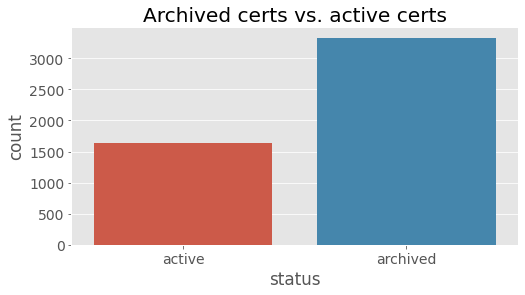

In [11]:
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})
sns.countplot(x=df["status"]).set_title("Archived certs vs. active certs")

In [12]:
# Archived vs. active in each category
fig = px.density_heatmap(df, x="category", y="status")
fig.show()

In [14]:
# Cert_id equal to None
none_cert_id_df = df[df["cert_id"].isna()].copy()

report_links = []

for _, row in none_cert_id_df.iterrows():
    report_links.append(row.report_link)
    

In [24]:
import os
import requests

BASE_PDF_DIR = r"/home/george/disk_100/non_cert_id_pds"
investigate_urls = []

for index, pdf_url in enumerate(report_links):
    if index < 238:
        continue
    response = requests.get(pdf_url)
    print(f"Processing: {index}/{len(report_links)}; RESPONSE: {response.status_code}")      

    if response.status_code == 200:
        file_name = f"{os.path.basename(pdf_url)}_index_{index}"
        file_path = os.path.join(BASE_PDF_DIR, file_name)

        with open(file_path, "wb") as file:
            file.write(response.content)
    else:
        investigate_urls.append(pdf_url)
        


Processing: 238/312; RESPONSE: 200
Processing: 239/312; RESPONSE: 200
Processing: 240/312; RESPONSE: 200
Processing: 241/312; RESPONSE: 200
Processing: 242/312; RESPONSE: 200
Processing: 243/312; RESPONSE: 200
Processing: 244/312; RESPONSE: 200
Processing: 245/312; RESPONSE: 200
Processing: 246/312; RESPONSE: 200
Processing: 247/312; RESPONSE: 200
Processing: 248/312; RESPONSE: 200
Processing: 249/312; RESPONSE: 200
Processing: 250/312; RESPONSE: 200
Processing: 251/312; RESPONSE: 200
Processing: 252/312; RESPONSE: 200
Processing: 253/312; RESPONSE: 200
Processing: 254/312; RESPONSE: 200
Processing: 255/312; RESPONSE: 200
Processing: 256/312; RESPONSE: 200
Processing: 257/312; RESPONSE: 200
Processing: 258/312; RESPONSE: 200
Processing: 259/312; RESPONSE: 200
Processing: 260/312; RESPONSE: 200
Processing: 261/312; RESPONSE: 200
Processing: 262/312; RESPONSE: 200
Processing: 263/312; RESPONSE: 200
Processing: 264/312; RESPONSE: 200
Processing: 265/312; RESPONSE: 200
Processing: 266/312;

In [25]:
print(investigate_urls)

# 6
# ['https://www.commoncriteriaportal.org/files/epfiles/Document%20SAFER%20Blue%202%20Security%20Target%20V1.10_???.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/emCA%20Certification%20Report%20v1.0.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/[KECS-CR-13-28]%20AhnLab%20TrusGuard%20V2.2(??).pdf', 'https://www.commoncriteriaportal.org/files/epfiles/st_vid10024a-vr.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/st_vid4016b-vr.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/st_vid4016a-vr.pdf']
# 2
# ['https://www.commoncriteriaportal.org/files/epfiles/ANSSI-CC_2010-03en1.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/0308a_pdf.pdf']
# 2
# ['https://www.commoncriteriaportal.org/files/epfiles/st_vid10355-vr.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/silverpeak-v31-cert-eng.pdf']
# 4 
# ['https://www.commoncriteriaportal.org/files/epfiles/st_vid1023-vr.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/st_vid3012a-vr.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/st_vid10491-vr', 'https://www.commoncriteriaportal.org/files/epfiles/SERTIT-017_CR_Thinklogical_VX160_KVM_Matrix_switch_v1.01.pdf']
# print(len(investigate_urls))

['https://www.commoncriteriaportal.org/files/epfiles/st_vid1023-vr.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/st_vid3012a-vr.pdf', 'https://www.commoncriteriaportal.org/files/epfiles/st_vid10491-vr', 'https://www.commoncriteriaportal.org/files/epfiles/SERTIT-017_CR_Thinklogical_VX160_KVM_Matrix_switch_v1.01.pdf']
4


### Which certificates are referenced at least by one certificate? 

In [13]:
def is_directly_affected_by(references):
    if references is np.nan:
        return False
    
    return True

def count_directly_affected_by(references):
    if references is np.nan:
        return np.nan
    return len(references)

directly_affected_by_df = df.copy()
directly_affected_by_df["is_directly_referenced_by"] = df["directly_referenced_by"].apply(is_directly_affected_by)
directly_affected_by_df["directly_referenced_by_sum"] = directly_affected_by_df["directly_referenced_by"].apply(count_directly_affected_by)
directly_affected_by_df.sort_values(by="directly_referenced_by_sum", ascending=False, inplace=True)
directly_affected_by_df.head()

cert_id  \
dgst                                        
f041e5b526e79ef4     BSI-DSZ-CC-0410-2007   
dfc0e5c6e48f7c5a  BSI-DSZ-CC-0837-V2-2014   
9dab3f1341f54c42     BSI-DSZ-CC-0555-2009   
dd000f356b48904d     BSI-DSZ-CC-0813-2012   
e2e705cabd42e40e     BSI-DSZ-CC-0829-2012   

                                                               name    status  \
dgst                                                                            
f041e5b526e79ef4  NXP Secure Smart Card Controller P5CD080V0B, P...  archived   
dfc0e5c6e48f7c5a  NXP Secure Smart Card Controller P60x080/052/0...    active   
9dab3f1341f54c42  NXP Smart Card Controller P5CD081V1A and its m...  archived   
dd000f356b48904d  Infineon smart card IC (Security Controller) M...  archived   
e2e705cabd42e40e  Infineon smart card IC (Security Controller) M...  archived   

                                                           category  \
dgst                                                                  
f041e5b526e79ef4  ICs, Smart Cards and Smart Card-Related Device...   
dfc0e5c6e48f7c5a  ICs, Smart Cards and Smart Card-Related Device...   
9dab3f1341f54c42  ICs, Smart Cards and Smart Card-Related Device...   
dd000f356b48904d  ICs, Smart Cards and Smart Card-Related Device...   
e2e705cabd42e40e  ICs, Smart Cards and Smart Card-Related Device...   

                                                       manufacturer scheme  \
dgst                                                                         
f041e5b526e79ef4  NXP Semiconductors Germany GmbH Business Line ...     DE   
dfc0e5c6e48f7c5a  NXP Semiconductors Germany GmbH Business Line ...     DE   
9dab3f1341f54c42                                 NXP Semiconductors     DE   
dd000f356b48904d                           Infineon Technologies AG     DE   
e2e705cabd42e40e                           Infineon Technologies AG     DE   

                 cert_lab                            security_level  \
dgst                                                                  
f041e5b526e79ef4    [BSI]  {AVA_VLA.4, ALC_DVS.2, EAL5+, AVA_MSU.3}   
dfc0e5c6e48f7c5a    [BSI]             {EAL6+, ASE_TSS.2, ALC_FLR.1}   
9dab3f1341f54c42    [BSI]                                   {EAL5+}   
dd000f356b48904d    [BSI]             {ALC_DVS.2, AVA_VAN.5, EAL5+}   
e2e705cabd42e40e    [BSI]             {ALC_DVS.2, AVA_VAN.5, EAL5+}   

                 not_valid_before not_valid_after  ... extracted_versions  \
dgst                                               ...                      
f041e5b526e79ef4       2007-07-05      2019-09-01  ...                {-}   
dfc0e5c6e48f7c5a       2014-10-24             NaT  ...              {052}   
9dab3f1341f54c42       2009-11-10      2019-09-01  ...                {-}   
dd000f356b48904d       2012-06-06      2019-09-01  ...   {1.02.008, 1.01}   
e2e705cabd42e40e       2012-09-05      2019-09-01  ...   {1.02.013, 1.01}   

                 cpe_matches verified_cpe_matches related_cves  \
dgst                                                             
f041e5b526e79ef4         NaN                  NaN          NaN   
dfc0e5c6e48f7c5a         NaN                  NaN          NaN   
9dab3f1341f54c42         NaN                  NaN          NaN   
dd000f356b48904d         NaN                  NaN          NaN   
e2e705cabd42e40e         NaN                  NaN          NaN   

                                             directly_referenced_by  \
dgst                                                                  
f041e5b526e79ef4  {BSI-DSZ-CC-0533-2009, DCSSI-2008/45, BSI-DSZ-...   
dfc0e5c6e48f7c5a  {ANSSI-CC-2016/48, ANSSI-CC-2016/17, ANSSI-CC-...   
9dab3f1341f54c42  {BSI-DSZ-CC-0703-2011, BSI-DSZ-CC-0675-2011, A...   
dd000f356b48904d  {ANSSI-CC-2012/44, ANSSI-CC-2012/51, BSI-DSZ-C...   
e2e705cabd42e40e  {ANSSI-CC-2015/09, BSI-DSZ-CC-0898-2014, ANSSI...   

                                           indirectly_referenced_by  \
dgst                               

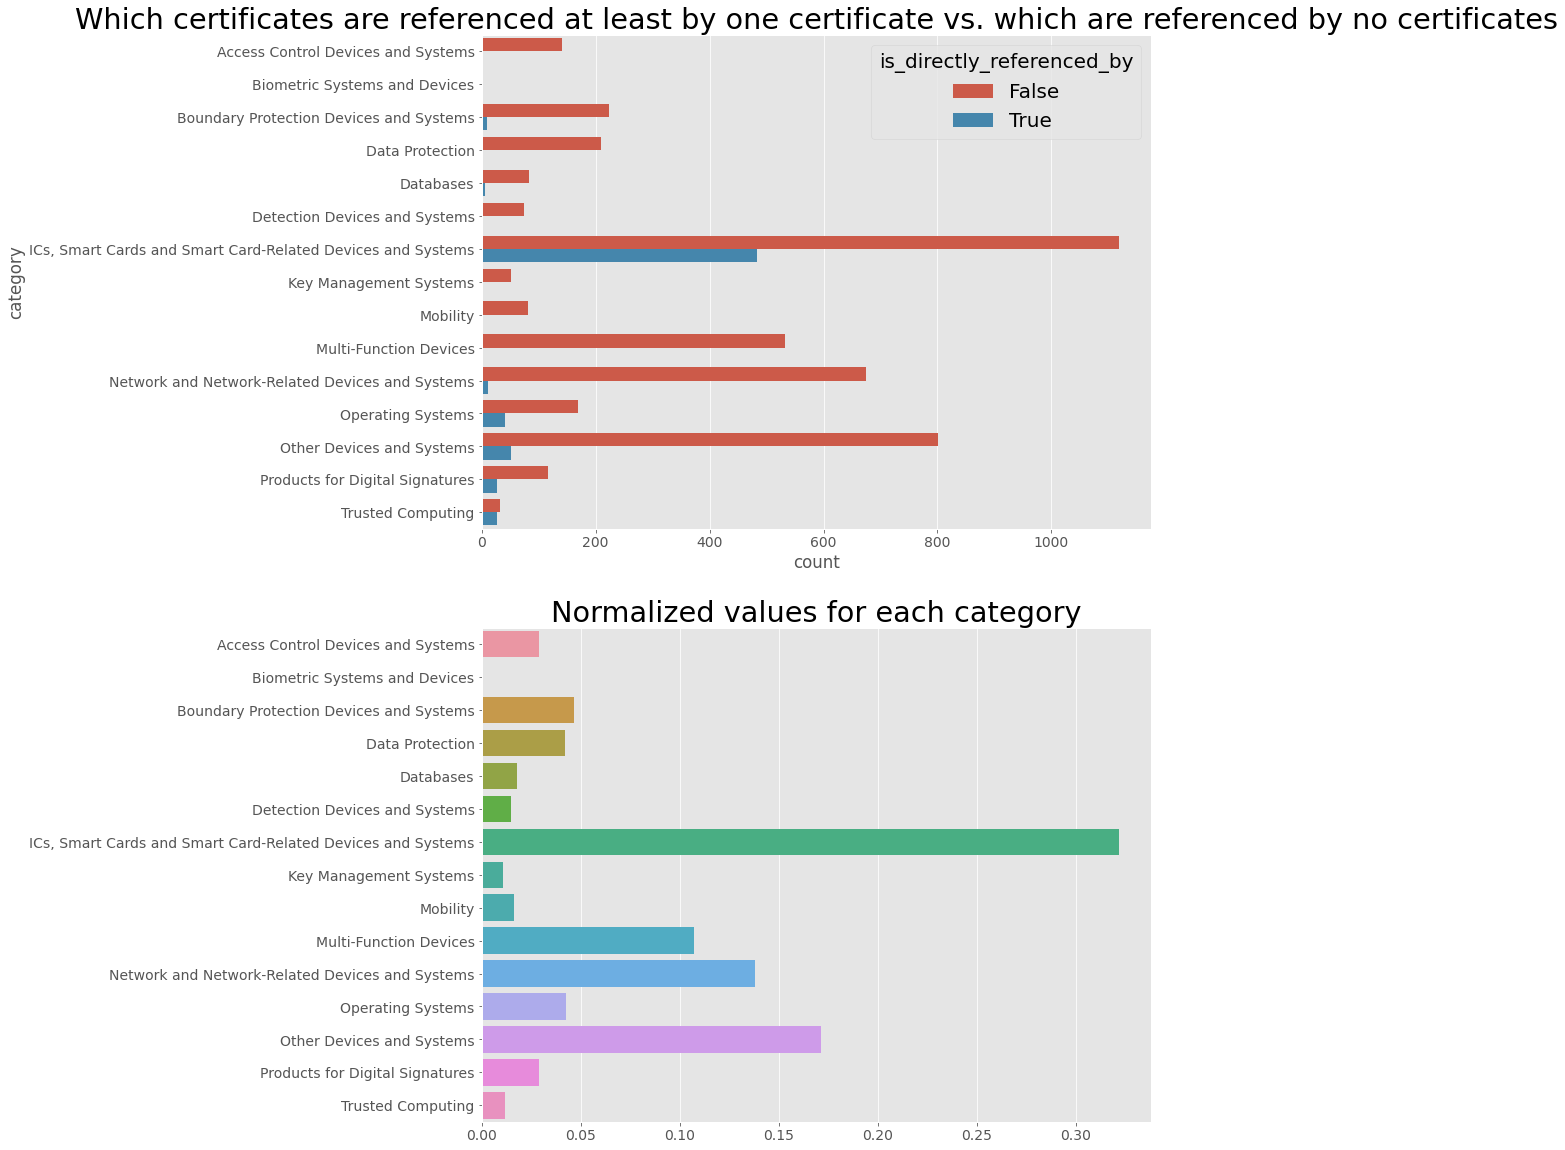

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,20))
normalized_serie = directly_affected_by_df["category"].value_counts(normalize=True)
plt.rcParams.update({'font.size': 20})
sns.countplot(y="category", hue="is_directly_referenced_by", data=directly_affected_by_df, ax=ax1).set_title("Which certificates are referenced at least by one certificate vs. which are referenced by no certificates")
sns.barplot(y=normalized_serie.index, x=normalized_serie.values, ax=ax2).set_title("Normalized values for each category")
plt.show()

### Which certificates are referencing no other?

In [15]:
no_affecting_df = df[df["directly_referencing"].isna() & df["indirectly_referencing"].isna()]

print(f"There are total {no_affecting_df.shape[0]} certificates referencing no other certificates.")

There are total 3770 certificates referencing no other certificates.


In [16]:
no_affecting_df.head()

cert_id  \
dgst                              
8298c7814b3b2860  KECS-CR-22-11   
9a1c767d358eee50            NaN   
979e00ac7d3e229c  KECS-CR-21-63   
a6015339aa4434cf  KECS-CR-21-52   
a89ee15539d006d1    CSEC2019015   

                                                               name  status  \
dgst                                                                          
8298c7814b3b2860                                   KSignAccess V4.1  active   
9a1c767d358eee50    VeroGuard HSM Digital ID for Open Networks v1.0  active   
979e00ac7d3e229c                                  SafeIdentity v5.1  active   
a6015339aa4434cf                                     Bandi SSO v7.0  active   
a89ee15539d006d1  DriveLock Agent 2019.2 (Device and Application...  active   

                                            category  \
dgst                                                   
8298c7814b3b2860  Access Control Devices and Systems   
9a1c767d358eee50  Access Control Devices and Systems   
979e00ac7d3e229c  Access Control Devices and Systems   
a6015339aa4434cf  Access Control Devices and Systems   
a89ee15539d006d1  Access Control Devices and Systems   

                               manufacturer scheme cert_lab  \
dgst                                                          
8298c7814b3b2860            KSign Co., LTD.     KR      NaN   
9a1c767d358eee50  VeroGuard Systems Pty Ltd     AU      NaN   
979e00ac7d3e229c           Hancom With Inc.     KR      NaN   
a6015339aa4434cf                    Bandi S     KR      NaN   
a89ee15539d006d1               DriveLock SE     SE      NaN   

                      security_level not_valid_before not_valid_after  ...  \
dgst                                                                   ...   
8298c7814b3b2860                  {}       2022-03-30      2027-03-30  ...   
9a1c767d358eee50  {ALC_FLR.1, EAL2+}       2022-02-23      2027-02-23  ...   
979e00ac7d3e229c                  {}       2021-11-05      2026-11-05  ...   
a6015339aa4434cf                  {}       2021-09-08      2026-09-08  ...   
a89ee15539d006d1   {EAL3, ALC_FLR.3}       2021-04-07      2026-04-07  ...   

                                                            st_link  \
dgst                                                                  
8298c7814b3b2860  https://www.commoncriteriaportal.org/files/epf...   
9a1c767d358eee50  https://www.commoncriteriaportal.org/files/epf...   
979e00ac7d3e229c  https://www.commoncriteriaportal.org/files/epf...   
a6015339aa4434cf  https://www.commoncriteriaportal.org/files/epf...   
a89ee15539d006d1  https://www.commoncriteriaportal.org/files/epf...   

                               manufacturer_web extracted_versions  \
dgst                                                                 
8298c7814b3b2860                            NaN              {4.1}   
9a1c767d358eee50  https://www.veroguard.com.au/              {1.0}   
979e00ac7d3e229c     https://www.hsecure.co.kr/              {5.1}   
a6015339aa4434cf       https://www.bandisnc.com              {7.0}   
a89ee15539d006d1     https://www.drivelock.com/           {2019.2}   

                 cpe_matches verified_cpe_matches  related_cves  \
dgst                                                              
8298c7814b3b2860         NaN                  NaN           NaN   
9a1c767d358eee50         NaN                  NaN           NaN   
979e00ac7d3e229c         NaN                  NaN           NaN   
a6015339aa4434cf         NaN                  NaN           NaN   
a89ee15539d006d1         NaN                  NaN           NaN   

                 directly_referenced_by indirectly_referenced_by  \
dgst                                                               
8298c7814b3b2860                    NaN                      NaN   
9a1c767d358eee50                    NaN                      NaN   
979e00ac7d3e229c                    NaN                      NaN   
a6015339aa4434cf                    NaN    

### How many no affecting certificates are affected by other certificates?

In [17]:
affected_but_no_affecting_df = no_affecting_df[no_affecting_df["directly_referenced_by"].notna() & no_affecting_df["indirectly_referenced_by"].notna()]
print(f"There are total of {affected_but_no_affecting_df.shape[0]} certificates which are affected by other certificates and affecting no certificates.")

There are total of 193 certificates which are affected by other certificates and affecting no certificates.


### How many certificates are not affected by other certificates, nor affecting other certificates?

In [18]:
def is_no_affecting_nor_affected(directly_affecting, indirectly_affecting, directly_affected_by, indirectly_affected_by):
    if directly_affecting is np.nan and indirectly_affecting is np.nan and directly_affected_by is np.nan and indirectly_affected_by is np.nan:
        return True
    
    return False


no_affecting_no_affected_df = df.copy()
no_affecting_no_affected_df["is_no_referencing_nor_referenced"] = df.apply(lambda x: is_no_affecting_nor_affected(x["directly_referencing"], x["indirectly_referencing"], x["directly_referenced_by"], x["indirectly_referenced_by"]), axis=1)
no_affecting_no_affected_df.head()

cert_id  \
dgst                              
8298c7814b3b2860  KECS-CR-22-11   
9a1c767d358eee50            NaN   
979e00ac7d3e229c  KECS-CR-21-63   
a6015339aa4434cf  KECS-CR-21-52   
a89ee15539d006d1    CSEC2019015   

                                                               name  status  \
dgst                                                                          
8298c7814b3b2860                                   KSignAccess V4.1  active   
9a1c767d358eee50    VeroGuard HSM Digital ID for Open Networks v1.0  active   
979e00ac7d3e229c                                  SafeIdentity v5.1  active   
a6015339aa4434cf                                     Bandi SSO v7.0  active   
a89ee15539d006d1  DriveLock Agent 2019.2 (Device and Application...  active   

                                            category  \
dgst                                                   
8298c7814b3b2860  Access Control Devices and Systems   
9a1c767d358eee50  Access Control Devices and Systems   
979e00ac7d3e229c  Access Control Devices and Systems   
a6015339aa4434cf  Access Control Devices and Systems   
a89ee15539d006d1  Access Control Devices and Systems   

                               manufacturer scheme cert_lab  \
dgst                                                          
8298c7814b3b2860            KSign Co., LTD.     KR      NaN   
9a1c767d358eee50  VeroGuard Systems Pty Ltd     AU      NaN   
979e00ac7d3e229c           Hancom With Inc.     KR      NaN   
a6015339aa4434cf                    Bandi S     KR      NaN   
a89ee15539d006d1               DriveLock SE     SE      NaN   

                      security_level not_valid_before not_valid_after  ...  \
dgst                                                                   ...   
8298c7814b3b2860                  {}       2022-03-30      2027-03-30  ...   
9a1c767d358eee50  {ALC_FLR.1, EAL2+}       2022-02-23      2027-02-23  ...   
979e00ac7d3e229c                  {}       2021-11-05      2026-11-05  ...   
a6015339aa4434cf                  {}       2021-09-08      2026-09-08  ...   
a89ee15539d006d1   {EAL3, ALC_FLR.3}       2021-04-07      2026-04-07  ...   

                               manufacturer_web extracted_versions  \
dgst                                                                 
8298c7814b3b2860                            NaN              {4.1}   
9a1c767d358eee50  https://www.veroguard.com.au/              {1.0}   
979e00ac7d3e229c     https://www.hsecure.co.kr/              {5.1}   
a6015339aa4434cf       https://www.bandisnc.com              {7.0}   
a89ee15539d006d1     https://www.drivelock.com/           {2019.2}   

                 cpe_matches verified_cpe_matches related_cves  \
dgst                                                             
8298c7814b3b2860         NaN                  NaN          NaN   
9a1c767d358eee50         NaN                  NaN          NaN   
979e00ac7d3e229c         NaN                  NaN          NaN   
a6015339aa4434cf         NaN                  NaN          NaN   
a89ee15539d006d1         NaN                  NaN          NaN   

                  directly_referenced_by indirectly_referenced_by  \
dgst                                                                
8298c7814b3b2860                     NaN                      NaN   
9a1c767d358eee50                     NaN                      NaN   
979e00ac7d3e229c                     NaN                      NaN   
a6015339aa4434cf                     NaN                      NaN   
a89ee15539d006d1                     NaN                      NaN   

                 directly_referencing indirectly_referencing  \
dgst                                                           
8298c7814b3b2860                  NaN                    NaN   
9a1c767d358eee50                  NaN                    NaN   
979e00ac7d3e229c                  NaN                    NaN   
a6015339aa4434cf                  NaN                    NaN   
a89ee15539d006d1    

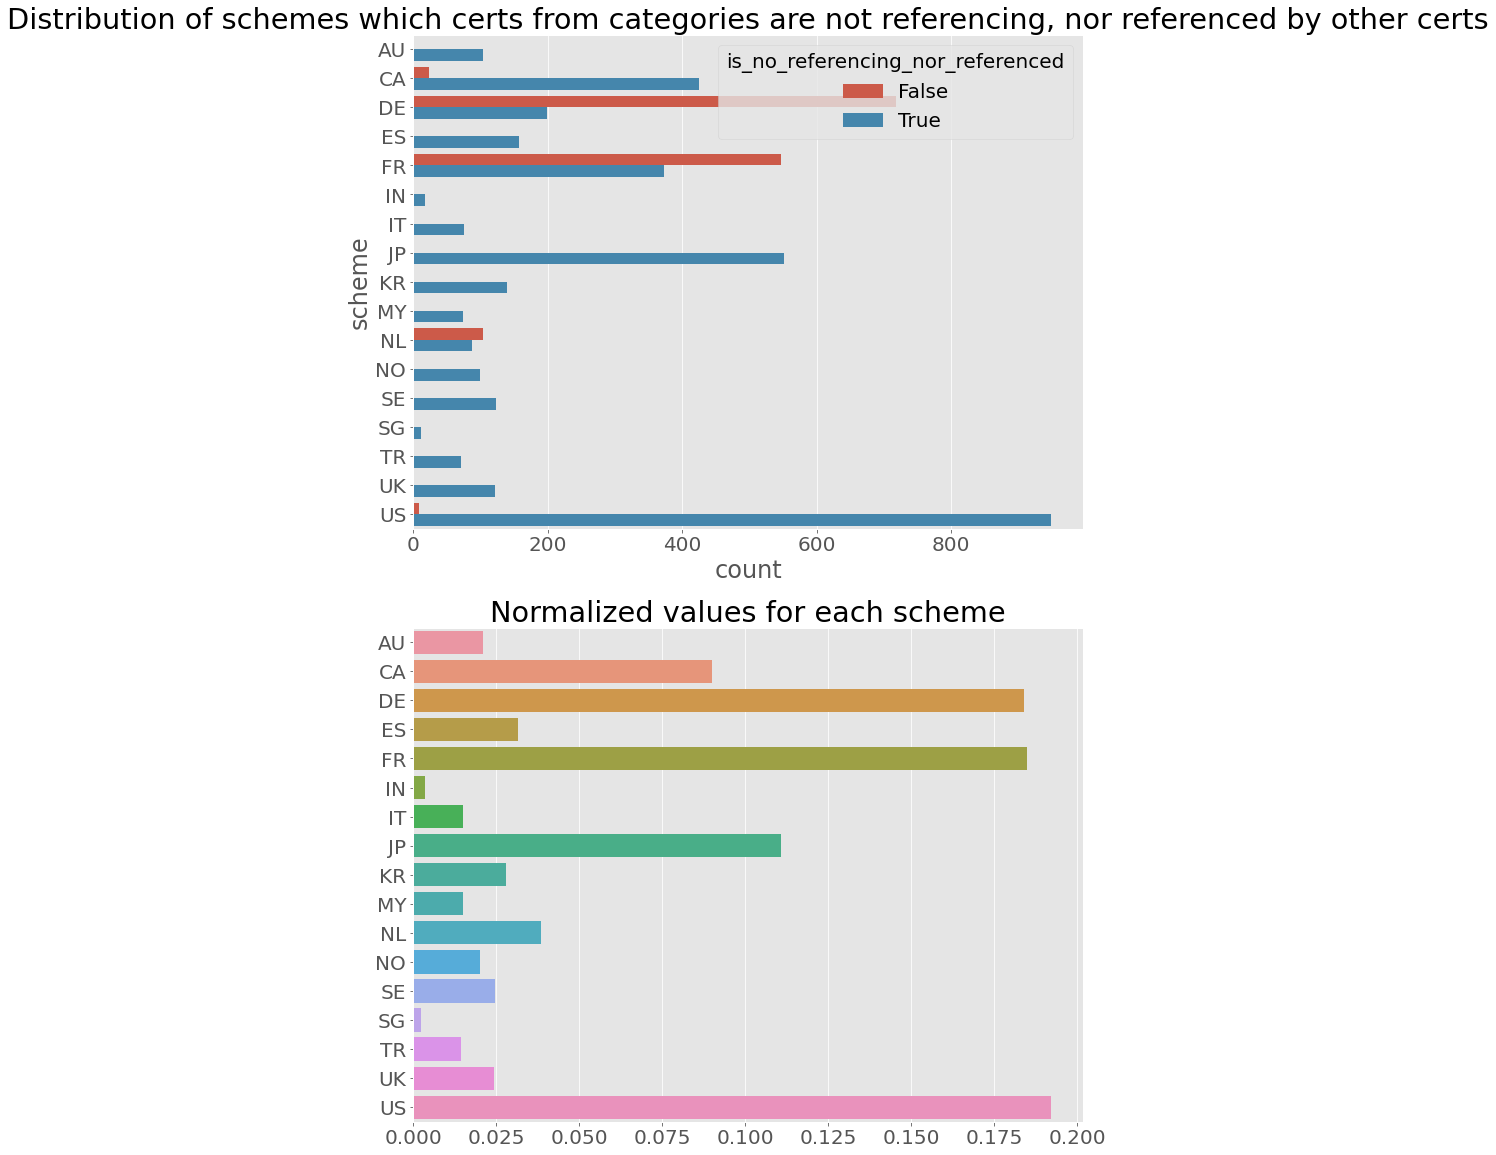

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,20))
normalized_serie = no_affecting_no_affected_df["scheme"].value_counts(normalize=True)
plt.rcParams.update({'font.size': 20})
sns.countplot(y="scheme", hue="is_no_referencing_nor_referenced", data=no_affecting_no_affected_df, ax=ax1).set_title("Distribution of schemes which certs from categories are not referencing, nor referenced by other certs")
sns.barplot(y=normalized_serie.index, x=normalized_serie.values, ax=ax2).set_title("Normalized values for each scheme")
plt.show()

### Which certificates are dependent on the archived certificates?

In [20]:
archived_cert_id_list = df[df["cert_id"].notna() & (df["status"] == "archived")]["cert_id"].tolist()

def contains_archived_cert_dependency(affected_by):
    if affected_by is np.nan:
        return False
    
    for cert_id in affected_by:
        if cert_id in archived_cert_id_list:
            return True
        
    return False


depends_on_archived_df = df.copy()
depends_on_archived_df["referenced_by_archived"] = depends_on_archived_df["directly_referenced_by"].apply(contains_archived_cert_dependency)
total_records_dependent = sum(depends_on_archived_df["referenced_by_archived"])
print(f"Total {total_records_dependent} certificates are referenced by at least one archived certicates.")

Total 434 certificates are referenced by at least one archived certicates.


In [21]:
# How many ACTIVE certificates are directly referencing at least 1 archived certificate
from typing import Set

archived_cert_id_list = df[df["cert_id"].notna() & (df["status"] == "archived")]["cert_id"].tolist()


def is_referencing_archived(directly_affecting: Set[str]):
    if directly_affecting is np.nan:
        return False
    
    for cert_id in directly_affecting:
        if cert_id in archived_cert_id_list:
            return True
        
    return False

active_certs_df = df[(df["cert_id"].notna()) & (df["status"] == "active")].copy()
total_active_referencing_certs = sum(active_certs_df["directly_referencing"].notna())
active_certs_df["is_referencing_archived"] = active_certs_df["directly_referencing"].apply(is_referencing_archived)
total_active_certs_referencing_archived = sum(active_certs_df["is_referencing_archived"])

print(f"Out of {active_certs_df.shape[0]} active certificates, {total_active_referencing_certs} are referencing at least 1 certificate")
print(f"Out of {total_active_referencing_certs} referencing cert, {total_active_certs_referencing_archived} are referencing at least 1 already archived certificate")

Out of 1506 active certificates, 422 are referencing at least 1 certificate
Out of 422 referencing cert, 138 are referencing at least 1 already archived certificate


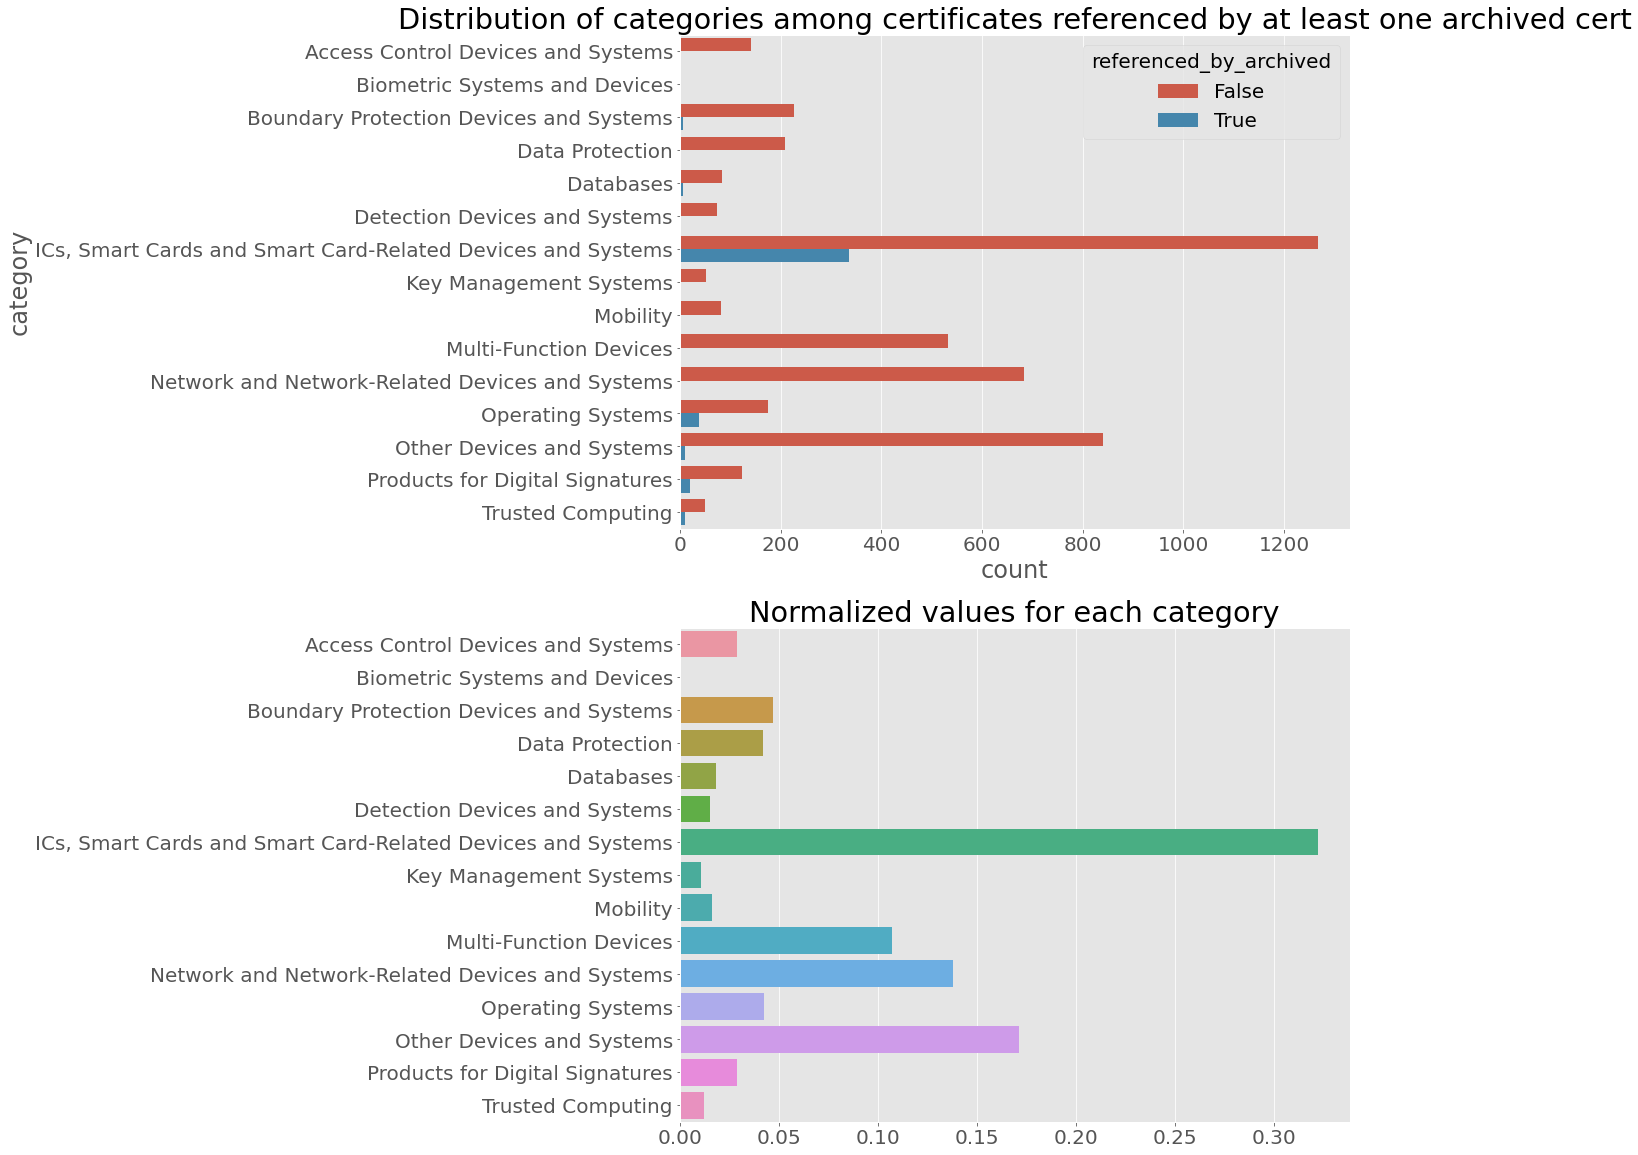

In [22]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,20))
normalized_serie = depends_on_archived_df["category"].value_counts(normalize=True)
plt.rcParams.update({'font.size': 20})
sns.countplot(y="category", hue="referenced_by_archived", data=depends_on_archived_df, ax=ax1).set_title("Distribution of categories among certificates referenced by at least one archived cert")
sns.barplot(y=normalized_serie.index, x=normalized_serie.values, ax=ax2).set_title("Normalized values for each category")
plt.show()

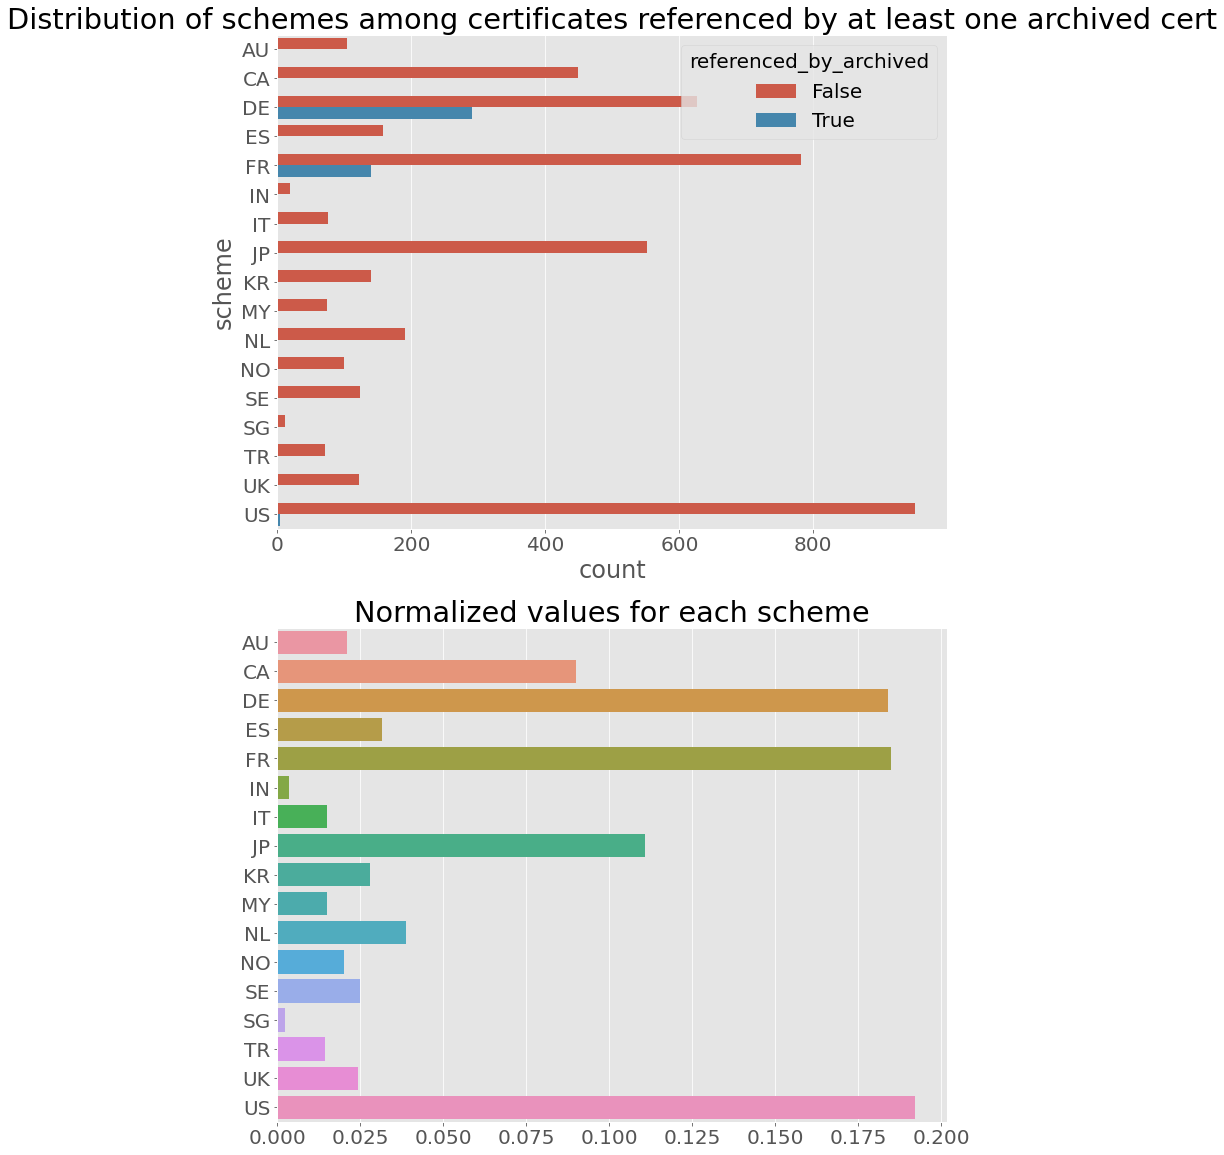

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,20))
normalized_serie = depends_on_archived_df["scheme"].value_counts(normalize=True)
plt.rcParams.update({'font.size': 20})
sns.countplot(y="scheme", hue="referenced_by_archived", data=depends_on_archived_df, ax=ax1).set_title("Distribution of schemes among certificates referenced by at least one archived cert")
sns.barplot(y=normalized_serie.index, x=normalized_serie.values, ax=ax2).set_title("Normalized values for each scheme")
plt.show()

### BSI + NSCIB + ANSSI - references

In [24]:
from typing import Set
from enum import Enum


class CertType(Enum):
    BSI = "bsi"
    ANSSI = "anssi"
    NSCIB = "nscib"

    

def get_cert_type(cert_id):
    if cert_id is np.nan:
        return None
    
    if cert_id.lower().startswith(CertType.BSI.value):
        return CertType.BSI.value
    
    if cert_id.lower().startswith(CertType.ANSSI.value):
        return CertType.ANSSI.value
    
    if cert_id.lower().startswith(CertType.NSCIB.value):
        return CertType.NSCIB.value
    
    return None


def is_referencing_cert_type(directly_referencing_set: Set[str], cert_type: CertType) -> bool:
    if directly_referencing_set is np.nan:
        return False
    
    for cert_id in directly_referencing_set:
        if get_cert_type(cert_id) == cert_type.value:
            return True
        
    return False


def get_referencing_certs(dset, cert_type: CertType):
    total = 0
    
    for _, row in dset.iterrows():
        total += is_referencing_cert_type(row["directly_referencing"], cert_type)
    
    return total

df["cert_type"] = df["cert_id"].apply(get_cert_type)

bsi_df = df[df["cert_type"] == CertType.BSI.value].copy()
anssi_df = df[df["cert_type"] == CertType.ANSSI.value].copy()
nscib_df = df[df["cert_type"] == CertType.NSCIB.value].copy()

bsi_total_referencing = bsi_df[bsi_df["directly_referencing"].notna()].shape[0]
anssi_total_referencing = anssi_df[anssi_df["directly_referencing"].notna()].shape[0]
nscib_total_referencing = nscib_df[nscib_df["directly_referencing"].notna()].shape[0]

bsi_referencing_anssi_total = get_referencing_certs(bsi_df, CertType.ANSSI)
bsi_referencing_nscib_total = get_referencing_certs(bsi_df, CertType.NSCIB)

anssi_referencing_bsi_total = get_referencing_certs(anssi_df, CertType.BSI)
anssi_referencing_nscib_total = get_referencing_certs(anssi_df, CertType.NSCIB)

nscib_referencing_bsi = get_referencing_certs(nscib_df, CertType.BSI)
nscib_referencing_anssi = get_referencing_certs(nscib_df, CertType.ANSSI)


print(f"BSI: total of {bsi_df.shape[0]} records, {bsi_total_referencing} certificates reference at least one certificate")
print(f"Out of {bsi_total_referencing} certificates {bsi_referencing_anssi_total} reference at least 1 ANSSI certificate")
print(f"Out of {bsi_total_referencing} certificates {bsi_referencing_nscib_total} reference at least 1 NSCIB certificate")

print()

print(f"ANSSI: total of {anssi_df.shape[0]} records, {anssi_total_referencing} certificates reference at least one certificate")
print(f"Out of {anssi_total_referencing} certificates {anssi_referencing_bsi_total} reference at least 1 BSI certificate")
print(f"Out of {anssi_total_referencing} certificates {anssi_referencing_nscib_total} reference at least 1 NSCIB certificate")

print()

print(f"NSCIB: total of {nscib_df.shape[0]} records, {nscib_total_referencing} certificate reference at least one certificate")
print(f"Out of {nscib_total_referencing} certificates {nscib_referencing_bsi} reference at least 1 BSI certificate")
print(f"Out of {nscib_total_referencing} certificates {nscib_referencing_anssi} reference at least 1 ANSSI certificate")

BSI: total of 936 records, 592 certificates reference at least one certificate
Out of 592 certificates 16 reference at least 1 ANSSI certificate
Out of 592 certificates 16 reference at least 1 NSCIB certificate

ANSSI: total of 725 records, 459 certificates reference at least one certificate
Out of 459 certificates 214 reference at least 1 BSI certificate
Out of 459 certificates 20 reference at least 1 NSCIB certificate

NSCIB: total of 182 records, 98 certificate reference at least one certificate
Out of 98 certificates 30 reference at least 1 BSI certificate
Out of 98 certificates 19 reference at least 1 ANSSI certificate


### Which certificates are referencing each other? (= are crossed referenced)

In [224]:
def is_already_involved(cross_reference_list: List[Tuple[str, str]], certs_set: Set[str]) -> bool:
    return certs_set in cross_reference_list

def is_cert_referencing_other_cert(root_cert_id: str, affected_cert_id: str) -> bool:
    return affected_cert_id in cross_df[cross_df["cert_id"] == root_cert_id].iloc[0]["directly_referencing"]

cross_reference_list: List[Set[str]] = []
cross_df = df[(df["cert_id"].notna()) & (df["directly_referencing"].notna())]
count = 1
total = cross_df.shape[0]

for cert_record in cross_df.itertuples():
    cert_id = cert_record.cert_id
    print(count)
    for another_cert_record in cross_df.itertuples():

        another_cert_id = another_cert_record.cert_id
        
        if cert_record.cert_id == another_cert_record.cert_id:
            continue
            
        certs_set = set([cert_id, another_cert_id])
        
        if is_cert_referencing_other_cert(cert_id, another_cert_id) and is_cert_referencing_other_cert(another_cert_id, cert_id) and not is_already_involved(cross_reference_list, certs_set):
            cross_reference_list.append(certs_set)
    count += 1 
    
    
print(f"Total of {len(cross_reference_list)} crossed referenced certificates.")
print(cross_reference_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### What are the EAL levels typically affecting a certificate? E.g. are certificates referencing EAL5 typically higher or same level?

In [26]:
df.head()

cert_id  \
dgst                              
8298c7814b3b2860  KECS-CR-22-11   
9a1c767d358eee50            NaN   
979e00ac7d3e229c  KECS-CR-21-63   
a6015339aa4434cf  KECS-CR-21-52   
a89ee15539d006d1    CSEC2019015   

                                                               name  status  \
dgst                                                                          
8298c7814b3b2860                                   KSignAccess V4.1  active   
9a1c767d358eee50    VeroGuard HSM Digital ID for Open Networks v1.0  active   
979e00ac7d3e229c                                  SafeIdentity v5.1  active   
a6015339aa4434cf                                     Bandi SSO v7.0  active   
a89ee15539d006d1  DriveLock Agent 2019.2 (Device and Application...  active   

                                            category  \
dgst                                                   
8298c7814b3b2860  Access Control Devices and Systems   
9a1c767d358eee50  Access Control Devices and Systems   
979e00ac7d3e229c  Access Control Devices and Systems   
a6015339aa4434cf  Access Control Devices and Systems   
a89ee15539d006d1  Access Control Devices and Systems   

                               manufacturer scheme cert_lab  \
dgst                                                          
8298c7814b3b2860            KSign Co., LTD.     KR      NaN   
9a1c767d358eee50  VeroGuard Systems Pty Ltd     AU      NaN   
979e00ac7d3e229c           Hancom With Inc.     KR      NaN   
a6015339aa4434cf                    Bandi S     KR      NaN   
a89ee15539d006d1               DriveLock SE     SE      NaN   

                      security_level not_valid_before not_valid_after  ...  \
dgst                                                                   ...   
8298c7814b3b2860                  {}       2022-03-30      2027-03-30  ...   
9a1c767d358eee50  {ALC_FLR.1, EAL2+}       2022-02-23      2027-02-23  ...   
979e00ac7d3e229c                  {}       2021-11-05      2026-11-05  ...   
a6015339aa4434cf                  {}       2021-09-08      2026-09-08  ...   
a89ee15539d006d1   {EAL3, ALC_FLR.3}       2021-04-07      2026-04-07  ...   

                               manufacturer_web extracted_versions  \
dgst                                                                 
8298c7814b3b2860                            NaN              {4.1}   
9a1c767d358eee50  https://www.veroguard.com.au/              {1.0}   
979e00ac7d3e229c     https://www.hsecure.co.kr/              {5.1}   
a6015339aa4434cf       https://www.bandisnc.com              {7.0}   
a89ee15539d006d1     https://www.drivelock.com/           {2019.2}   

                 cpe_matches verified_cpe_matches related_cves  \
dgst                                                             
8298c7814b3b2860         NaN                  NaN          NaN   
9a1c767d358eee50         NaN                  NaN          NaN   
979e00ac7d3e229c         NaN                  NaN          NaN   
a6015339aa4434cf         NaN                  NaN          NaN   
a89ee15539d006d1         NaN                  NaN          NaN   

                  directly_referenced_by indirectly_referenced_by  \
dgst                                                                
8298c7814b3b2860                     NaN                      NaN   
9a1c767d358eee50                     NaN                      NaN   
979e00ac7d3e229c                     NaN                      NaN   
a6015339aa4434cf                     NaN                      NaN   
a89ee15539d006d1                     NaN                      NaN   

                 directly_referencing indirectly_referencing cert_type  
dgst                                                                    
8298c7814b3b2860                  NaN                    NaN      None  
9a1c767d358eee50                  NaN                    NaN      None  
979e00ac7d3e229c                  NaN                    NaN      None  
a6015339aa4434cf                  NaN  

In [27]:
# Introduce security level EAL variable
CC_EALS = ['EAL1', 'EAL1+', 'EAL2', 'EAL2+', 'EAL3', 'EAL3+', 'EAL4', 'EAL4+', 'EAL5', 'EAL5+', 'EAL6+', 'EAL7', 'EAL7+']
df['highest_security_level'] = df.security_level.map(lambda levels_dict: [eal for eal in levels_dict if eal.startswith('EAL')] if levels_dict else np.nan)
df.highest_security_level = df.highest_security_level.map(lambda x: x[0] if x and isinstance(x, list) else np.nan)
df.highest_security_level = pd.Categorical(df.highest_security_level, categories=CC_EALS, ordered=True)

In [28]:
levels_df = df[(df["highest_security_level"].notna()) & (df["directly_referencing"].notna()) & (df["cert_id"].notna())].copy()
levels_df.head()

cert_id  \
dgst                                     
98c1ac41aedcdae2  BSI-DSZ-CC-1142-2020   
0eff4063e68d7cd6  BSI-DSZ-CC-0823-2014   
47750cedacaaf370  NSCIB-CC-12-34853-CR   
9b5f007978a96739  NSCIB-CC-11-34146-CR   
86e9da10bc176267   NSCIB-CC-0434407-CR   

                                                               name  status  \
dgst                                                                          
98c1ac41aedcdae2                                     genuscreen 7.0  active   
0eff4063e68d7cd6                                     genuscreen 4.0  active   
47750cedacaaf370                 Nexor Sentinel 3E Filtering System  active   
9b5f007978a96739  Waterfall Unidirectional Security Gateway mode...  active   
86e9da10bc176267                   STMicroelectronics JSIGN4 V1.0.4  active   

                                                           category  \
dgst                                                                  
98c1ac41aedcdae2            Boundary Protection Devices and Systems   
0eff4063e68d7cd6            Boundary Protection Devices and Systems   
47750cedacaaf370            Boundary Protection Devices and Systems   
9b5f007978a96739            Boundary Protection Devices and Systems   
86e9da10bc176267  ICs, Smart Cards and Smart Card-Related Device...   

                                       manufacturer scheme cert_lab  \
dgst                                                                  
98c1ac41aedcdae2                         genua GmbH     DE    [BSI]   
0eff4063e68d7cd6                          GeNUA mbH     DE    [BSI]   
47750cedacaaf370                         Nexor Ltd.     NL       []   
9b5f007978a96739  Waterfall Security Solutions Ltd.     NL       []   
86e9da10bc176267                 STMicroelectronics     NL       []   

                                            security_level not_valid_before  \
dgst                                                                          
98c1ac41aedcdae2  {ASE_TSS.2, ALC_FLR.2, AVA_VAN.4, EAL4+}       2020-08-18   
0eff4063e68d7cd6  {ASE_TSS.2, ALC_FLR.2, AVA_VAN.4, EAL4+}       2014-10-29   
47750cedacaaf370                        {ALC_FLR.2, EAL4+}       2012-12-21   
9b5f007978a96739  {ALC_DVS.2, AVA_VAN.5, ALC_FLR.2, EAL4+}       2012-07-12   
86e9da10bc176267                        {AVA_VAN.5, EAL4+}       2022-03-18   

                 not_valid_after  ... extracted_versions cpe_matches  \
dgst                              ...                                  
98c1ac41aedcdae2      2025-08-17  ...              {7.0}         NaN   
0eff4063e68d7cd6             NaT  ...              {4.0}         NaN   
47750cedacaaf370      2022-12-21  ...                {-}         NaN   
9b5f007978a96739      2022-07-12  ...           {1, 400}         NaN   
86e9da10bc176267      2027-03-18  ...            {1.0.4}         NaN   

                 verified_cpe_matches related_cves  directly_referenced_by  \
dgst                                                                         
98c1ac41aedcdae2                  NaN          NaN                     NaN   
0eff4063e68d7cd6                  NaN          NaN  {BSI-DSZ-CC-0966-2015}   
47750cedacaaf370                  NaN          NaN                     NaN   
9b5f007978a96739                  NaN          NaN                     NaN   
86e9da10bc176267                  NaN          NaN                     NaN   

                  indirectly_referenced_by  \
dgst                                         
98c1ac41aedcdae2                       NaN   
0eff4063e68d7cd6    {BSI-DSZ-CC-0966-2015}   
47750cedacaaf370                       NaN   
9b5f007978a96739                       NaN   
86e9da10bc176267                       NaN   

                                               directly_referencing  \
dgst                                                                  
98c1ac41aedcdae2                             {BSI-DSZ-CC-1085-2019}   
0eff4063e68d7cd6                            

In [29]:
from typing import Dict

def get_cert_id_security_level(cert_id: str) -> str:
    cert_id_df = df[df["cert_id"] == cert_id]
    
    if cert_id_df.empty:  # we do not have record in main dset for this cert_id
        return None
    
    return cert_id_df.iloc[0]["highest_security_level"]


def get_levels_of_affected_certs(affected_certs: Set[str]) -> Dict[str, int]:
    result = {}
    
    for affected_cert_id in affected_certs:
        security_level = get_cert_id_security_level(affected_cert_id)
        
        if security_level is None:  # cert_id does not follow condition for levels_df
            continue
            
        result[security_level] = result.get(security_level, 0) + 1
        
    return result
        

levels_df["referencing_security_levels"] = levels_df["directly_referencing"].apply(get_levels_of_affected_certs)
levels_df.head(20)

cert_id  \
dgst                                        
98c1ac41aedcdae2     BSI-DSZ-CC-1142-2020   
0eff4063e68d7cd6     BSI-DSZ-CC-0823-2014   
47750cedacaaf370     NSCIB-CC-12-34853-CR   
9b5f007978a96739     NSCIB-CC-11-34146-CR   
86e9da10bc176267      NSCIB-CC-0434407-CR   
185aa4f76ff15d62     BSI-DSZ-CC-1172-2022   
b4a2999b439b1ba8  BSI-DSZ-CC-1178-V2-2022   
0ce083454814c1ba  BSI-DSZ-CC-1179-V2-2022   
ac1257069b2f4afd  BSI-DSZ-CC-1113-V3-2022   
0f3900cdcd0c7f3e      NSCIB-CC-127667-CR3   
2be10f342e68a89e  BSI-DSZ-CC-0963-V3-2021   
7d8dc0575933f142  BSI-DSZ-CC-1025-V4-2021   
5eda77c801e2df86  BSI-DSZ-CC-0891-V6-2021   
65a47f93451f13de  BSI-DSZ-CC-1079-V3-2021   
723ba544431f7874     BSI-DSZ-CC-1162-2021   
84c868322995b179  BSI-DSZ-CC-0951-V5-2021   
e9c5d02aae54cdc5  BSI-DSZ-CC-0891-V5-2021   
b8370ceababbca40     NSCIB-CC-0089911-CR2   
e38c6956b53dfd36     NSCIB-CC-0089864-CR2   
7980d204dbc3ecee     BSI-DSZ-CC-1178-2021   

                                                               name  status  \
dgst                                                                          
98c1ac41aedcdae2                                     genuscreen 7.0  active   
0eff4063e68d7cd6                                     genuscreen 4.0  active   
47750cedacaaf370                 Nexor Sentinel 3E Filtering System  active   
9b5f007978a96739  Waterfall Unidirectional Security Gateway mode...  active   
86e9da10bc176267                   STMicroelectronics JSIGN4 V1.0.4  active   
185aa4f76ff15d62                          CardOS V6.0 ID R1.0 (BAC)  active   
b4a2999b439b1ba8  Infineon Technologies AG OPTIGA™ Trusted Platf...  active   
0ce083454814c1ba  Infineon Technologies AG OPTIGA™ Trusted Platf...  active   
ac1257069b2f4afd  Infineon Technologies AG OPTIGA™ Trusted Platf...  active   
0f3900cdcd0c7f3e                       EP-COS V3.0 Plain, EPCOSV30e  active   
2be10f342e68a89e  Infineon smartcard IC (Security Controller) M7...  active   
7d8dc0575933f142  Infineon smart card IC (Security Controller) I...  active   
5eda77c801e2df86  Infineon Security Controller M7892 Design Step...  active   
65a47f93451f13de  Infineon Security Controller IFX_CCI_00000Fh, ...  active   
723ba544431f7874                                CardOS V6.0 ID R1.0  active   
84c868322995b179  Infineon Security Controller M5073 G11 with sp...  active   
e9c5d02aae54cdc5  Infineon Security Controller M7892 Design Step...  active   
b8370ceababbca40       Thales CSP CSP v1.0 on Upteq NFC422 v1.0 JCS  active   
e38c6956b53dfd36                             Thales NFC422 v1.0 JCS  active   
7980d204dbc3ecee  Infineon Technologies AG OPTIGA™ Trusted Platf...  active   

                                                           category  \
dgst                                                                  
98c1ac41aedcdae2            Boundary Protection Devices and Systems   
0eff4063e68d7cd6            Boundary Protection Devices and Systems   
47750cedacaaf370            Boundary Protection Devices and Systems   
9b5f007978a96739            Boundary Protection Devices and Systems   
86e9da10bc176267  ICs, Smart Cards and Smart Card-Related Device...   
185aa4f76ff15d62  ICs, Smart Cards and Smart Card-Related Device...   
b4a2999b439b1ba8  ICs, Smart Cards and Smart Card-Related Device...   
0ce083454814c1ba  ICs, Smart Cards and Smart Card-Related Device...   
ac1257069b2f4afd  ICs, Smart Cards and Smart Card-Related Device...   
0f3900cdcd0c7f3e  ICs, Smart Cards and Smart Card-Related Device...   
2be10f342e68a89e  ICs, Smart Cards and Smart Card-Related Device...   
7d8dc0575933f142  ICs, Smart Cards and Smart Card-Related Device...   
5eda77c801e2df86  ICs, Smart Cards and Smart Card-Related Device...   
65a47f93451f13de  ICs, Smart Cards and Smart Card-Related Device...   
723ba544431f7874  ICs, Smart Cards and Smart Card-Related Device...   
84c868322995b179  ICs, Smart Cards and Smart Card-Related Device...   
e9c5d02aae54cdc5  ICs, Sma

In [30]:
security_level_references = {}

for security_level in CC_EALS:
    security_level_list = []
    counter = collections.Counter()
    security_level_df = levels_df[levels_df["highest_security_level"] == security_level]["referencing_security_levels"]
    
    for security_dict in security_level_df:
        counter.update(security_dict)
                
    print(f"Certs with security level {security_level} are directly referencing other certificates with levels: {dict(counter)}")
        
    security_level_references[security_level] = counter

Certs with security level EAL1 are directly referencing other certificates with levels: {'EAL4+': 1}
Certs with security level EAL1+ are directly referencing other certificates with levels: {}
Certs with security level EAL2 are directly referencing other certificates with levels: {'EAL2': 7, 'EAL2+': 1, 'EAL4+': 1, 'EAL5+': 1}
Certs with security level EAL2+ are directly referencing other certificates with levels: {'EAL2': 5, 'EAL2+': 11, 'EAL4+': 1}
Certs with security level EAL3 are directly referencing other certificates with levels: {'EAL3': 10, 'EAL5+': 1}
Certs with security level EAL3+ are directly referencing other certificates with levels: {'EAL3+': 19, 'EAL3': 2, 'EAL4+': 1}
Certs with security level EAL4 are directly referencing other certificates with levels: {'EAL6+': 3, 'EAL5+': 2, 'EAL4+': 5, 'EAL4': 6}
Certs with security level EAL4+ are directly referencing other certificates with levels: {'EAL4+': 396, 'EAL5+': 388, 'EAL6+': 76, 'EAL4': 2, 'EAL3+': 4, 'EAL5': 4, 'EAL3

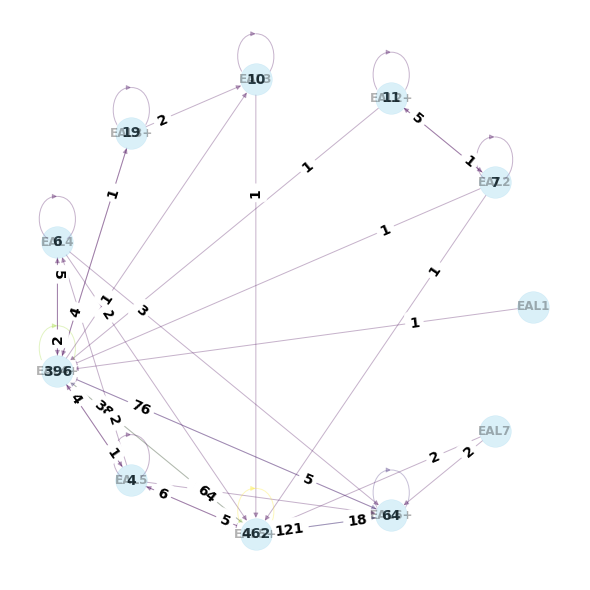

In [98]:
import matplotlib.pyplot as plt
import networkx as nx

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(8, 8))
    
G = nx.DiGraph(seed=42)
graph_edges = []
graph_edge_labels = {}
nodes = []

for node in security_level_references:
    for referenced_node in security_level_references[node]:
        edge_weight = security_level_references[node][referenced_node]
        graph_edges.append((node, referenced_node, {"weight": edge_weight}))
        graph_edge_labels[(node, referenced_node)] = edge_weight
        nodes.append(node)

        
G.add_nodes_from(nodes)
G.add_edges_from(graph_edges)

#pos = nx.shell_layout(G)
pos = nx.circular_layout(G)

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw(G, pos, node_color='skyblue', node_size=1000, edge_color=weights, with_labels=True, font_weight='bold', alpha=0.3)


nx.draw_networkx_edge_labels(
   G, pos,graph_edge_labels, label_pos=0.75, font_size=14, font_weight="bold", 
)
plt.show()

#### Graph for references among security levels

In [34]:
plot_graphviz_graph(title="Dependencies Among Security Levels", 
                    filename="security_level_references", 
                    nodes=CC_EALS, 
                    data_dict=security_level_references)

security_level_references has been rendered successfully


#### Plotly barplot of references among security levels

In [31]:
security_level_references_df = pd.DataFrame(security_level_references).transpose()
fig = px.bar(security_level_references_df, title="Dependencies Among Security Levels", category_orders={"variable": CC_EALS})
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [150]:
# fig = px.imshow(df, x="category", y="status")
# fig.show()
security_levels_heatmap_dict = {}
index = 0

for source, source_dict in security_level_references.items():
    
    for target in source_dict:
        count = source_dict[target]
        security_levels_heatmap_dict[index] = {"source": source, "target": target, "count": count}
        index += 1
        
security_levels_heatmap_df = pd.DataFrame(security_levels_heatmap_dict).transpose()

fig = px.density_heatmap(security_levels_heatmap_df, x="target", y="source", z="count", text_auto=True, color_continuous_scale='Blues', title="Direct references among security levels")
fig.update_xaxes(title="Referenced Security Level", categoryorder='array', categoryarray= CC_EALS)
fig.update_yaxes(title="Referencing Security Level")

fig.show()

In [100]:
# from bokeh.charts import output_file, Chord
# from bokeh.io import show

import holoviews as hv
from holoviews import opts, dim

chord_dict = {}

# for index, source_tpl in enumerate(security_level_references.items()):
#     source = source_tpl[0]
    
#     for target in security_level_references[source]:
#         count = security_level_references[source][target]
#         print(f"source {source} -> {target}: {count}")
        
#         chord_dict[index] = {"source": source, "target": target, "count": count}

index = 0

for source, source_dict in security_level_references.items():
    
    for target in source_dict:
        count = source_dict[target]
        chord_dict[index] = {"source": source, "target": target, "count": count}
        index += 1
        
        
        
# chord_df = pd.DataFrame(chord_dict)
# chord_df = chord_df.transpose()

# hv.extension('bokeh')

# nodes = hv.Dataset(pd.DataFrame(chord_df["source"]))

# # chord diagram
# chord = hv.Chord((chord_df, nodes)).select(value=(5, None))
# chord.opts(
#     opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
#                labels='name', node_color=dim('count').str()))
# # security_level_references_df

from bokeh.sampledata.les_mis import data

links = pd.DataFrame(data['links'])
chord = hv.Chord(links)

nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
nodes.data.head()

print(links)
print(nodes.data)

chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

     source  target  value
0         1       0      1
1         2       0      8
2         3       0     10
3         3       2      6
4         4       0      1
..      ...     ...    ...
249      76      66      1
250      76      63      1
251      76      62      1
252      76      48      1
253      76      58      1

[254 rows x 3 columns]
    index             name  group
0       0           Myriel      1
1       1         Napoleon      1
2       2  Mlle.Baptistine      1
3       3     Mme.Magloire      1
4       4     CountessdeLo      1
..    ...              ...    ...
72     72        Toussaint      5
73     73           Child1     10
74     74           Child2     10
75     75           Brujon      4
76     76    Mme.Hucheloup      8

[77 rows x 3 columns]


:Chord   [source,target]   (value)

In [99]:
chord=hv.Chord(links[:60])
chord.opts(node_color='index', edge_color='start',\
label_index='index',cmap='Category10', edge_cmap='Category10' )

:Chord   [source,target]   (value)

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G=nx.DiGraph()
G.add_nodes_from(range(L))
G.add_edges_from(E)

plt.figure(figsize=(18,18))
nx.draw_circular(G,node_color='g', edge_color='#909090', node_size=900)
plt.axis('equal')



NameError: name 'L' is not defined

(-1.1662976017930418,
 1.205797136651943,
 -1.2028066442207273,
 1.3052610147273078)

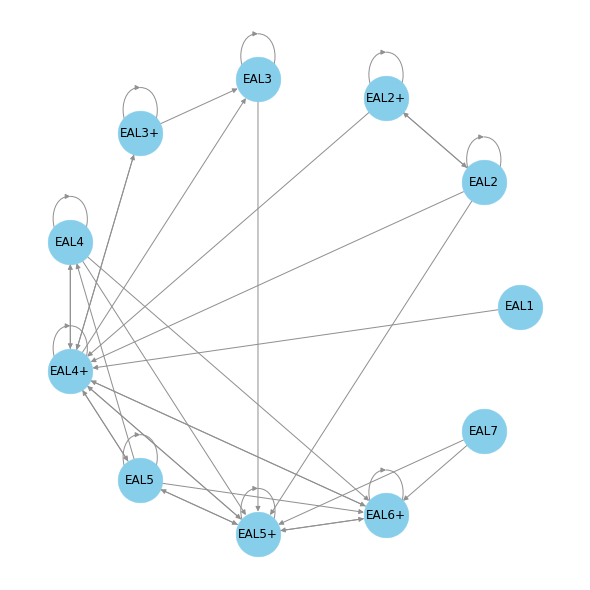

In [82]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(8,8))
    
G = nx.DiGraph(seed=42)
graph_edges = []
graph_edge_labels = {}
nodes = []

for node in security_level_references:
    for referenced_node in security_level_references[node]:
        edge_weight = security_level_references[node][referenced_node]
        graph_edges.append((node, referenced_node, {"weight": edge_weight}))
        graph_edge_labels[(node, referenced_node)] = edge_weight
        nodes.append(node)

        
G.add_nodes_from(nodes)
G.add_edges_from(graph_edges)

nx.draw_circular(G,node_color='skyblue', edge_color='#909090', node_size=2000,  with_labels=True)

plt.axis('equal')

In [ ]:

# Reversed graph

# 1) Negative is referenced
# 2) References


In [88]:
# Security levels in each category
fig = px.density_heatmap(df, x="category", y="highest_security_level", text_auto=True, category_orders={"highest_security_level": CC_EALS})
fig.show()

### Basic Analysis of most common category

In [89]:
cards_df = df[df["category"] == "ICs, Smart Cards and Smart Card-Related Devices and Systems"]
print(f"There are total {cards_df.shape[0]} rows ICs, Smart Cards and Smart Card-Related Devices and Systems category.")

There are total 1602 rows ICs, Smart Cards and Smart Card-Related Devices and Systems category.


#### How many certificates are active/archived

In [90]:
total_archived_certs = sum(cards_df["status"] == "archived")
total_active_certs = sum(cards_df["status"] == "active")

print(f"There are total {total_archived_certs} archived records among smart-cards")
print(f"There are total {total_active_certs} active records among smart-cards")

There are total 1023 archived records among smart-cards
There are total 579 active records among smart-cards


#### Which manufacturer is the most common in this category?

In [91]:
most_common_smart_card_manufacturer = cards_df["manufacturer"].value_counts().index[0]
print(f"The most common manufacturer in smart cards category is: {most_common_smart_card_manufacturer}")

The most common manufacturer in smart cards category is: Infineon Technologies AG


#### Analysis of security levels of smart-cards

In [92]:
# The most common security level among smart-cards
most_common_sec_level = cards_df["highest_security_level"].value_counts().index[0]
sec_level_amount = cards_df["highest_security_level"].value_counts()[0]

print(f"Most common security level among smart-cards is {most_common_sec_level} with {sec_level_amount} occurences.")

Most common security level among smart-cards is EAL5+ with 715 occurences.


In [93]:
# The lowest common security level achieved in dataset
security_level_occurences = cards_df["highest_security_level"].value_counts()
filtered_sec_levels = [sec_level for sec_level, count in security_level_occurences.items() if count > 0]
level_numbers = {x: y for x, y in zip(CC_EALS, range(len(CC_EALS)))}

lowest_smart_card_security_level = None
lowest_security_level_int = None

for sec_level in filtered_sec_levels:
    if lowest_security_level_int is None:
        lowest_security_level_int = level_numbers[sec_level]
        lowest_smart_card_security_level = sec_level
    
    if level_numbers[sec_level] < lowest_security_level_int:
        lowest_security_level_int = level_numbers[sec_level]
        lowest_smart_card_security_level = sec_level
        
print(f"Lowest security level among smart cards in dataset: {lowest_smart_card_security_level}")

Lowest security level among smart cards in dataset: EAL1+


In [94]:
# The highest common security level in smart-card dataset
highest_smart_card_security_level = None
highest_security_level_int = None

for sec_level in filtered_sec_levels:
    if highest_security_level_int is None:
        highest_security_level_int = level_numbers[sec_level]
        highest_smart_card_security_level = sec_level
    
    if level_numbers[sec_level] > highest_security_level_int:
        highest_security_level_int = level_numbers[sec_level]
        highest_smart_card_security_level = sec_level
        
print(f"Highest security level among smart cards in dataset: {highest_smart_card_security_level}")

Highest security level among smart cards in dataset: EAL7


#### View data with lowest security level (EAL1+)

In [95]:
eal1_plus_df = cards_df[cards_df["highest_security_level"] == "EAL1+"]
eal1_plus_df.head()

cert_id  \
dgst                                                 
be0806db6fd6bbe8  Rapport de certification 2001/14   
1a95d138ccc7814a  Rapport de certification 2001/16   
35ac4cfd1f62df75  Rapport de certification 2001/22   
7c062b969e50e2af  Rapport de certification 2001/20   
f66157c81ab85729  Rapport de certification 2001/03   

                                                               name    status  \
dgst                                                                            
be0806db6fd6bbe8  ATMEL AT90SC6464C Integrated circuit (referenc...  archived   
1a95d138ccc7814a  CT2000 embedded Component (reference ST16RFHD5...  archived   
35ac4cfd1f62df75                 M/Chip Select v2.0.5.2 Application  archived   
7c062b969e50e2af  MODEUS electronic purse : MODEUS carrier card ...  archived   
f66157c81ab85729  Oberthur B0' application v1.0.1 and GemClub v1...  archived   

                                                           category  \
dgst                                                                  
be0806db6fd6bbe8  ICs, Smart Cards and Smart Card-Related Device...   
1a95d138ccc7814a  ICs, Smart Cards and Smart Card-Related Device...   
35ac4cfd1f62df75  ICs, Smart Cards and Smart Card-Related Device...   
7c062b969e50e2af  ICs, Smart Cards and Smart Card-Related Device...   
f66157c81ab85729  ICs, Smart Cards and Smart Card-Related Device...   

                                                   manufacturer scheme  \
dgst                                                                     
be0806db6fd6bbe8                           ATMEL Smart Card ICs     FR   
1a95d138ccc7814a                                            ASK     FR   
35ac4cfd1f62df75                       Mondex International Ltd     FR   
7c062b969e50e2af                   ASK, CP8, STMicroelectronics     FR   
f66157c81ab85729  Oberthur Card Systems, Gemplus, Trusted Logic     FR   

                 cert_lab      security_level not_valid_before  \
dgst                                                             
be0806db6fd6bbe8      NaN  {AVA_VLA.2, EAL1+}       2001-01-01   
1a95d138ccc7814a      NaN  {AVA_VLA.2, EAL1+}       2001-01-01   
35ac4cfd1f62df75      NaN  {AVA_VLA.2, EAL1+}       2001-01-01   
7c062b969e50e2af      NaN  {AVA_VLA.2, EAL1+}       2001-01-01   
f66157c81ab85729      NaN  {AVA_VLA.2, EAL1+}       2001-01-01   

                 not_valid_after  ... cpe_matches verified_cpe_matches  \
dgst                              ...                                    
be0806db6fd6bbe8      2019-09-01  ...         NaN                  NaN   
1a95d138ccc7814a      2019-09-01  ...         NaN                  NaN   
35ac4cfd1f62df75      2019-09-01  ...         NaN                  NaN   
7c062b969e50e2af      2019-09-01  ...         NaN                  NaN   
f66157c81ab85729      2019-09-01  ...         NaN                  NaN   

                 related_cves directly_referenced_by indirectly_referenced_by  \
dgst                                                                            
be0806db6fd6bbe8          NaN                    NaN                      NaN   
1a95d138ccc7814a          NaN                    NaN                      NaN   
35ac4cfd1f62df75          NaN                    NaN                      NaN   
7c062b969e50e2af          NaN                    NaN                      NaN   
f66157c81ab85729          NaN                    NaN                      NaN   

                  directly_referencing indirectly_referencing is_bsi_cert  \
dgst                                                                        
be0806db6fd6bbe8                   NaN                    NaN       False   
1a95d138ccc7814a                   NaN                    NaN       False   
35ac4cfd1f62df75                   NaN                    NaN       False   
7c062b969e50e2af                   NaN                    NaN       False   
f66157c81ab85729                   NaN                    NaN      

In [96]:
eal1_plus_df["scheme"].value_counts()

FR    14
AU     0
MY     0
UK     0
TR     0
SG     0
SE     0
NO     0
NL     0
KR     0
CA     0
JP     0
IT     0
IN     0
ES     0
DE     0
US     0
Name: scheme, dtype: int64

#### View data with highest security level (EAL7)

In [97]:
eal7_df = cards_df[cards_df["highest_security_level"] == highest_smart_card_security_level]
eal7_df.head()

cert_id  \
dgst                                 
8ee7145a1b48b578  ANSSI-CC-2020/33   
d08b5ddedd34448d  ANSSI-CC-2018/50   
ff45605151ec4eb1  ANSSI-CC-2013/40   
9231adbf747903df  ANSSI-CC-2013/12   
890f788a91fc2fa1  ANSSI-CC-2013/11   

                                                               name    status  \
dgst                                                                            
8ee7145a1b48b578               MultiApp V4 JavaCard Virtual Machine    active   
d08b5ddedd34448d  IDMotion V2 Multos Virtual Machine OS Multos V...    active   
ff45605151ec4eb1  Virtual Machine of Multos M3 G230M mask with A...  archived   
9231adbf747903df  Memory Management Unit des microcontrôleurs SA...  archived   
890f788a91fc2fa1  Virtual Machine of ID Motion V1 G231 mask with...  archived   

                                                           category  \
dgst                                                                  
8ee7145a1b48b578  ICs, Smart Cards and Smart Card-Related Device...   
d08b5ddedd34448d  ICs, Smart Cards and Smart Card-Related Device...   
ff45605151ec4eb1  ICs, Smart Cards and Smart Card-Related Device...   
9231adbf747903df  ICs, Smart Cards and Smart Card-Related Device...   
890f788a91fc2fa1  ICs, Smart Cards and Smart Card-Related Device...   

                                                  manufacturer scheme  \
dgst                                                                    
8ee7145a1b48b578                                       Gemalto     FR   
d08b5ddedd34448d                        Gemalto / Trusted Labs     FR   
ff45605151ec4eb1           Multos international / Trusted Labs     FR   
9231adbf747903df  Samsung Electronics Co., Ltd. / Trusted Labs     FR   
890f788a91fc2fa1                        Gemalto / Trusted Labs     FR   

                  cert_lab security_level not_valid_before not_valid_after  \
dgst                                                                         
8ee7145a1b48b578   [SERMA]         {EAL7}       2020-05-28      2025-05-28   
d08b5ddedd34448d  [THALES]         {EAL7}       2018-12-14      2023-12-14   
ff45605151ec4eb1       NaN         {EAL7}       2013-07-04      2019-09-01   
9231adbf747903df       NaN         {EAL7}       2013-03-29      2019-09-01   
890f788a91fc2fa1       NaN         {EAL7}       2013-03-29      2019-09-01   

                  ... cpe_matches verified_cpe_matches related_cves  \
dgst              ...                                                 
8ee7145a1b48b578  ...         NaN                  NaN          NaN   
d08b5ddedd34448d  ...         NaN                  NaN          NaN   
ff45605151ec4eb1  ...         NaN                  NaN          NaN   
9231adbf747903df  ...         NaN                  NaN          NaN   
890f788a91fc2fa1  ...         NaN                  NaN          NaN   

                 directly_referenced_by indirectly_referenced_by  \
dgst                                                               
8ee7145a1b48b578                    NaN                      NaN   
d08b5ddedd34448d                    NaN                      NaN   
ff45605151ec4eb1                    NaN                      NaN   
9231adbf747903df                    NaN                      NaN   
890f788a91fc2fa1                    NaN                      NaN   

                                               directly_referencing  \
dgst                                                                  
8ee7145a1b48b578  {BSI-DSZ-CC-0891-V4-2019, ANSSI-CC-2017/76-S01...   
d08b5ddedd34448d           {ANSSI-CC-2018/35, BSI-DSZ-CC-0945-2017}   
ff45605151ec4eb1                                                NaN   
9231adbf747903df                                                NaN   
890f788a91fc2fa1                                                NaN   

                                             indirectly_referencing  \
dgst                                                                  
8ee7145a1b48b578  {A

In [98]:
eal7_df["scheme"].value_counts()

FR    6
AU    0
MY    0
UK    0
TR    0
SG    0
SE    0
NO    0
NL    0
KR    0
CA    0
JP    0
IT    0
IN    0
ES    0
DE    0
US    0
Name: scheme, dtype: int64

In [99]:
eal7_df[eal7_df["status"] == "active"]

cert_id  \
dgst                                 
8ee7145a1b48b578  ANSSI-CC-2020/33   
d08b5ddedd34448d  ANSSI-CC-2018/50   

                                                               name  status  \
dgst                                                                          
8ee7145a1b48b578               MultiApp V4 JavaCard Virtual Machine  active   
d08b5ddedd34448d  IDMotion V2 Multos Virtual Machine OS Multos V...  active   

                                                           category  \
dgst                                                                  
8ee7145a1b48b578  ICs, Smart Cards and Smart Card-Related Device...   
d08b5ddedd34448d  ICs, Smart Cards and Smart Card-Related Device...   

                            manufacturer scheme  cert_lab security_level  \
dgst                                                                       
8ee7145a1b48b578                 Gemalto     FR   [SERMA]         {EAL7}   
d08b5ddedd34448d  Gemalto / Trusted Labs     FR  [THALES]         {EAL7}   

                 not_valid_before not_valid_after  ... cpe_matches  \
dgst                                               ...               
8ee7145a1b48b578       2020-05-28      2025-05-28  ...         NaN   
d08b5ddedd34448d       2018-12-14      2023-12-14  ...         NaN   

                 verified_cpe_matches related_cves directly_referenced_by  \
dgst                                                                        
8ee7145a1b48b578                  NaN          NaN                    NaN   
d08b5ddedd34448d                  NaN          NaN                    NaN   

                 indirectly_referenced_by  \
dgst                                        
8ee7145a1b48b578                      NaN   
d08b5ddedd34448d                      NaN   

                                               directly_referencing  \
dgst                                                                  
8ee7145a1b48b578  {BSI-DSZ-CC-0891-V4-2019, ANSSI-CC-2017/76-S01...   
d08b5ddedd34448d           {ANSSI-CC-2018/35, BSI-DSZ-CC-0945-2017}   

                                             indirectly_referencing  \
dgst                                                                  
8ee7145a1b48b578  {ANSSI-CC-2017/76-S01, BSI-DSZ-CC-0891-V3-2018...   
d08b5ddedd34448d  {BSI-DSZ-CC-0891-2015, ANSSI-CC-2018/35, BSI-D...   

                 is_bsi_cert is_anssi_cert highest_security_level  
dgst                                                               
8ee7145a1b48b578       False          True                   EAL7  
d08b5ddedd34448d       False          True                   EAL7  

[2 rows x 24 columns]

#### BSI certs in smart cards dataset

In [100]:
bsi_smart_cards_df = cards_df[cards_df["is_bsi_cert"]]

print(f"There is total of {bsi_smart_cards_df.shape[0]} BSI records among smart cards")

There is total of 533 BSI records among smart cards


#### Most common security levels among BSI smart card records

In [101]:
bsi_smart_cards_df["highest_security_level"].value_counts()

EAL4+    213
EAL5+    200
EAL6+     82
EAL3+     16
EAL3      12
EAL4       8
EAL5       1
EAL1       0
EAL1+      0
EAL2       0
EAL2+      0
EAL7       0
EAL7+      0
Name: highest_security_level, dtype: int64

#### ANSSI certs in smart cards dataset


In [102]:
anssi_smart_cards_df = cards_df[cards_df["is_anssi_cert"]]

print(f"There is total of {anssi_smart_cards_df.shape[0]} records ANSSI among smart cards")

There is total of 632 records ANSSI among smart cards


#### Most common security levels among ANSSI smart card records 

In [103]:
anssi_smart_cards_df["highest_security_level"].value_counts()

EAL5+    386
EAL4+    192
EAL6+     37
EAL5       6
EAL7       6
EAL3+      3
EAL4       2
EAL1       0
EAL1+      0
EAL2       0
EAL2+      0
EAL3       0
EAL7+      0
Name: highest_security_level, dtype: int64

#### Smarts cards which expires next year


In [104]:
next_year = datetime.datetime.now().year + 1

def is_expiring_next_year(series_datetime):
    return series_datetime.year == next_year


cards_next_year_expires_df = cards_df[cards_df["not_valid_after"].apply(is_expiring_next_year)]
cards_next_year_expires_df.head()

cert_id  \
dgst                                    
c5e25f90c7006546                  NaN   
744a7a202d909323                  NaN   
449c74a92ebb61a4                  NaN   
09b1192474bc8b27     ANSSI-CC-2018/32   
503a0d9db4445cbc  21.0.03/TSE-CCCS-64   

                                                               name  status  \
dgst                                                                          
c5e25f90c7006546  eTravel v2.3 on MultiApp v4.1 platform, BAC, E...  active   
744a7a202d909323  eTravel v2.3 on MultiApp v4.1 platform, BAC, E...  active   
449c74a92ebb61a4  eTravel v2.3 on MultiApp v4.1 platform, PACE, ...  active   
09b1192474bc8b27  Plateforme ouverte Java Card MultiApp V4.1 en ...  active   
503a0d9db4445cbc                                 Udea SSR_Core v1.0  active   

                                                           category  \
dgst                                                                  
c5e25f90c7006546  ICs, Smart Cards and Smart Card-Related Device...   
744a7a202d909323  ICs, Smart Cards and Smart Card-Related Device...   
449c74a92ebb61a4  ICs, Smart Cards and Smart Card-Related Device...   
09b1192474bc8b27  ICs, Smart Cards and Smart Card-Related Device...   
503a0d9db4445cbc  ICs, Smart Cards and Smart Card-Related Device...   

                                   manufacturer scheme cert_lab  \
dgst                                                              
c5e25f90c7006546           THALES DIS FRANCE SA     FR      NaN   
744a7a202d909323           THALES DIS FRANCE SA     FR      NaN   
449c74a92ebb61a4           THALES DIS FRANCE SA     FR      NaN   
09b1192474bc8b27           THALES DIS FRANCE SA     FR      NaN   
503a0d9db4445cbc  UDEA ELEKTRONİK SAN. TİC. A.Ş     TR      NaN   

                                                     security_level  \
dgst                                                                  
c5e25f90c7006546  {ALC_TAT.2, EAL4+, ALC_CMS.5, ATE_DPT.3, ALC_D...   
744a7a202d909323                      {ALC_DVS.2, AVA_VAN.5, EAL5+}   
449c74a92ebb61a4                                            {Basic}   
09b1192474bc8b27                      {ALC_DVS.2, AVA_VAN.5, EAL5+}   
503a0d9db4445cbc                                 {ALC_DVS.2, EAL4+}   

                 not_valid_before not_valid_after  ... cpe_matches  \
dgst                                               ...               
c5e25f90c7006546       2021-12-17      2023-12-12  ...         NaN   
744a7a202d909323       2021-12-17      2023-12-12  ...         NaN   
449c74a92ebb61a4       2021-12-17      2023-12-12  ...         NaN   
09b1192474bc8b27       2021-10-08      2023-08-03  ...         NaN   
503a0d9db4445cbc       2020-02-11      2023-02-11  ...         NaN   

                 verified_cpe_matches related_cves directly_referenced_by  \
dgst                                                                        
c5e25f90c7006546                  NaN          NaN                    NaN   
744a7a202d909323                  NaN          NaN                    NaN   
449c74a92ebb61a4                  NaN          NaN                    NaN   
09b1192474bc8b27                  NaN          NaN                    NaN   
503a0d9db4445cbc                  NaN          NaN                    NaN   

                 indirectly_referenced_by  directly_referencing  \
dgst                                                              
c5e25f90c7006546                      NaN                   NaN   
744a7a202d909323                      NaN                   NaN   
449c74a92ebb61a4                      NaN                   NaN   
09b1192474bc8b27                      NaN                   NaN   
503a0d9db4445cbc                      NaN                   NaN   

                 indirectly_referencing is_bsi_cert is_anssi_cert  \
dgst                                                                
c5e25f90c7006546                    NaN       False         False   
744a7a202d9093

### Which schemes are directly affecting certs with other schemes

In [105]:
df["scheme"].value_counts()

US    955
FR    920
DE    916
JP    551
CA    448
NL    191
ES    157
KR    139
SE    123
UK    121
AU    104
NO    100
IT     75
MY     74
TR     71
IN     17
SG     11
Name: scheme, dtype: int64

In [106]:
scheme_df = df[df["directly_referencing"].notna()]
print(f"Total of {scheme_df.shape[0]} certs are directly affecting other certs.")

Total of 1206 certs are directly affecting other certs.


In [107]:
def get_scheme_from_cert_id(cert_id: str) -> str:
    scheme_list = df[df["cert_id"] == cert_id]["scheme"].tolist()
    
    if not scheme_list:
        return None 
    
    
    return df[df["cert_id"] == cert_id]["scheme"].tolist()[0]

### Graph for scheme dependencies


In [108]:
CC_SCHEMES = ["US", "FR", "DE", "JP", "CA", "NL", "ES", "KR", "UK", "AU", "NO", "SE", "MY", "TR", "IT", "IN", "SG"]
scheme_references = {}


for scheme in CC_SCHEMES:
    counter = collections.Counter()
    scheme_affecting_series = scheme_df[scheme_df["scheme"] == scheme]["directly_referencing"]
    
    for affecting_set in scheme_affecting_series:
        tmp_dict = {}
        
        for cert_id in affecting_set:
            current_scheme = get_scheme_from_cert_id(cert_id)
            tmp_dict[current_scheme] = tmp_dict.get(current_scheme, 0) + 1
            
        counter.update(tmp_dict)
    
    scheme_references[scheme] = counter 
    
scheme_references

{'US': Counter({'US': 2, None: 3}),
 'FR': Counter({'DE': 229, None: 196, 'FR': 463, 'KR': 43, 'ES': 7, 'NL': 21}),
 'DE': Counter({None: 130,
          'DE': 804,
          'FR': 19,
          'NL': 13,
          'KR': 20,
          'US': 2,
          'ES': 13,
          'TR': 7}),
 'JP': Counter(),
 'CA': Counter({None: 22, 'US': 1}),
 'NL': Counter({None: 94, 'FR': 19, 'NL': 19, 'DE': 28, 'KR': 1}),
 'ES': Counter(),
 'KR': Counter(),
 'UK': Counter(),
 'AU': Counter(),
 'NO': Counter(),
 'SE': Counter(),
 'MY': Counter(),
 'TR': Counter(),
 'IT': Counter(),
 'IN': Counter(),
 'SG': Counter()}

In [109]:
plot_graphviz_graph(title="Dependencies Among Schemes", 
                    filename="schemes_references", 
                    nodes=CC_SCHEMES, 
                    data_dict=scheme_references)

schemes_references has been rendered successfully


In [110]:
scheme_references_df = pd.DataFrame(scheme_references).transpose()
scheme_references_df.drop([None], axis=1, inplace=True)  # dropping None column
scheme_references_df
fig = px.bar(scheme_references_df, title="Dependencies Among Schemes")
fig.show()

Text(0.5, 21.5, 'Schemes affected by specific scheme')

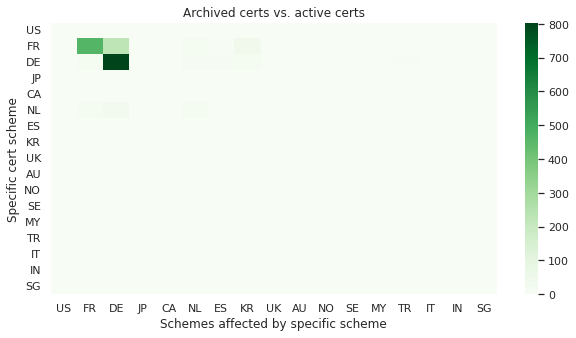

In [111]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 20})
heatmap_result = []


for scheme, counter in scheme_references.items():
    scheme_list = []
    for scheme_key in CC_SCHEMES:
        scheme_list.append(counter.get(scheme_key, 0))
    
    heatmap_result.append(scheme_list)

sns.set(style="whitegrid")
ax = sns.heatmap(heatmap_result, xticklabels=CC_SCHEMES, yticklabels=CC_SCHEMES,cmap="Greens").set_title("Archived certs vs. active certs")
plt.ylabel("Specific cert scheme")
plt.xlabel("Schemes affected by specific scheme")

#### Dependencies among scheme


In [112]:
def return_unique_years_in_dataset():    
    unique_years = set()

    for timestamp_record in scheme_df["not_valid_before"]:
        unique_years.add(timestamp_record.year)
        
    return unique_years

In [129]:
CC_SCHEMES = df["scheme"].unique().tolist()

def discover_scheme_dependiencies_in_dataset(dataset):
    result = {}

    for scheme in CC_SCHEMES:
        counter = collections.Counter()
        scheme_affecting_series = dataset[dataset["scheme"] == scheme]["directly_referencing"]

        for affecting_set in scheme_affecting_series:
            tmp_dict = {}

            for cert_id in affecting_set:
                
                current_scheme = get_scheme_from_cert_id(cert_id)
                
                if scheme == "FR" and current_scheme is None:
                    print(cert_id)
                tmp_dict[current_scheme] = tmp_dict.get(current_scheme, 0) + 1

            counter.update(tmp_dict)

        result[scheme] = counter

    return result

discover_scheme_dependiencies_in_dataset(scheme_df)

NSCIB-CC-180212_2
NSCIB-CC-180212_2
NSCIB-CC-180212_2
NSCIB-CC-180212_2
NSCIB-CC-180212_2
NSCIB-CC-98209-CR4
NSCIB-CC-98209-
NSCIB-CC-67206-CR3
NSCIB-CC-98209-CR4
NSCIB-CC-98209-
NSCIB-CC-67206-CR3
NSCIB-CC-98209-CR4
NSCIB-CC-98209-
NSCIB-CC-67206-CR3
ANSSI-CC-2019/33
ANSSI-CC-2019/34
ANSSI-CC-2019/35
ANSSI-CC-2019/36
ANSSI-CC-2019/47
ANSSI-CC-2019/48
ANSSI-CC-2019/49
ANSSI-CC-2019/50
ANSSI-CC-2019/28-M01
ANSSI-CC-2017/76-S01
NSCIB-CC-180212
NSCIB-CC-190212
ANSSI-CC-2019/33
ANSSI-CC-2019/34
ANSSI-CC-2019/35
ANSSI-CC-2019/36
ANSSI-CC-2015/59-M01
ANSSI-CC-2018/14
ANSSI-CC-2017/67
ANSSI-CC-2018/14
ANSSI-CC-2018/14
NSCIB-CC-98209
NSCIB-CC-98209-CR2
NSCIB-CC-17-67206-CR2
NSCIB-CC-15-67206
NSCIB-CC-98209
NSCIB-CC-98209-CR2
NSCIB-CC-17-67206-CR2
NSCIB-CC-15-67206
ANSSI-CC-2017/14
ANSSI-CC-2010/03-M01
ANSSI-CC-2010/03-M01
ANSSI-CC-2010/03-M01
ANSSI-CC-2010/03-M01
ANSSI-CC-2010/03-M01
ANSSI-CC-2010/03-M01
ANSSI-CC-2010/03-M01
ANSSI-CC-2010/03-M01
BSI-DSZ-CC-0782-V2-2017
NSCIB-CC-98209-CR
NSCIB-

{'KR': Counter(),
 'AU': Counter(),
 'SE': Counter(),
 'NL': Counter({None: 94, 'FR': 19, 'NL': 19, 'DE': 28, 'KR': 1}),
 'CA': Counter({None: 22, 'US': 1}),
 'ES': Counter(),
 'IN': Counter(),
 'MY': Counter(),
 'JP': Counter(),
 'DE': Counter({None: 130,
          'DE': 804,
          'FR': 19,
          'NL': 13,
          'KR': 20,
          'US': 2,
          'ES': 13,
          'TR': 7}),
 'SG': Counter(),
 'US': Counter({'US': 2, None: 3}),
 'IT': Counter(),
 'TR': Counter(),
 'NO': Counter(),
 'FR': Counter({'DE': 229, None: 196, 'FR': 463, 'KR': 43, 'ES': 7, 'NL': 21}),
 'UK': Counter()}

In [150]:
def get_category_from_cert_id(cert_id):
    category_list = df[df["cert_id"] == cert_id]["category"].tolist()
    
    if not category_list:
        return None
    
    return df[df["cert_id"] == cert_id]["category"].tolist()[0]

CC_CATEGORIES = df["category"].unique()

category_references = {}
category_df = df.copy()

for category in CC_CATEGORIES:
    counter = collections.Counter()
    category_affecting_series = category_df[category_df["category"] == category]["directly_referencing"]
    
    if category_affecting_series is np.nan:
        continue
    
    for affecting_set in category_affecting_series:
        
        if affecting_set is np.nan:
            continue

        tmp_dict = {}
        
        for cert_id in affecting_set:
            current_category = get_category_from_cert_id(cert_id)
            tmp_dict[current_category] = tmp_dict.get(current_category, 0) + 1
        
        counter.update(tmp_dict)
    
    category_references[category] = counter

category_references

{'Access Control Devices and Systems': Counter({'Access Control Devices and Systems': 2}),
 'Boundary Protection Devices and Systems': Counter({None: 11,
          'Boundary Protection Devices and Systems': 10}),
 'Data Protection': Counter({None: 1}),
 'Databases': Counter({'Databases': 8, 'Operating Systems': 2}),
 'Detection Devices and Systems': Counter({'ICs, Smart Cards and Smart Card-Related Devices and Systems': 1}),
 'ICs, Smart Cards and Smart Card-Related Devices and Systems': Counter({None: 376,
          'ICs, Smart Cards and Smart Card-Related Devices and Systems': 1360,
          'Products for Digital Signatures': 9,
          'Other Devices and Systems': 4,
          'Trusted Computing': 8,
          'Detection Devices and Systems': 3,
          'Databases': 1}),
 'Key Management Systems': Counter({'Key Management Systems': 4}),
 'Mobility': Counter(),
 'Multi-Function Devices': Counter(),
 'Network and Network-Related Devices and Systems': Counter({'Other Devices and S

### Dependencies Among Categories Graph

In [151]:
plot_graphviz_graph(title="Dependencies Among Categories", 
                    filename="categories_references", 
                    nodes=CC_CATEGORIES, 
                    data_dict=category_references)

categories_references has been rendered successfully


In [152]:
category_references_df = pd.DataFrame(category_references).transpose()
category_references_df.drop([None], axis=1, inplace=True)  # dropping None column
fig = px.bar(category_references_df, title="Dependencies Among Categories")
fig.show()

### Dependencies among manufacturers

In [153]:
def get_manufacturer_from_cert_id(cert_id):
    category_list = df[df["cert_id"] == cert_id]["manufacturer"].tolist()
    
    if not category_list:
        return None
    
    return df[df["cert_id"] == cert_id]["manufacturer"].tolist()[0]


CC_MANUFACTURERS = df[df["manufacturer"].notna()]["manufacturer"].unique().tolist()


manufacturers_references = {}
manufacturer_df = df.copy()

for manufacturer in CC_MANUFACTURERS:
    counter = collections.Counter()
    manufacturer_affecting_series = manufacturer_df[manufacturer_df["manufacturer"] == manufacturer]["directly_referencing"]
    
    if manufacturer_affecting_series is np.nan:
        continue
    
    for affecting_set in manufacturer_affecting_series:
        
        if affecting_set is np.nan:
            continue

        tmp_dict = {}
        
        for cert_id in affecting_set:
            current_manufacturer = get_manufacturer_from_cert_id(cert_id)
            tmp_dict[current_manufacturer] = tmp_dict.get(current_manufacturer, 0) + 1
        
        counter.update(tmp_dict)
    
    manufacturers_references[manufacturer] = counter


In [81]:
plot_graphviz_graph(title="Dependencies Among Manufacturers", 
                    filename="manufacturers_references", 
                    nodes=CC_MANUFACTURERS, 
                    data_dict=manufacturers_references)

manufacturers_references has been rendered successfully


In [ ]:
manufacturers_references_df = pd.DataFrame(manufacturers_references).transpose()
category_references_df.drop([None], axis=1, inplace=True)  # dropping None column
fig = px.bar(category_references_df, title="Dependencies Among Categories")
fig.show()

### Dependencies among laboratories


In [154]:
def extract_cert_lab(lab_list):
    if lab_list is np.nan:
        return None
    return lab_list[0]


df["extracted_lab"] = df["cert_lab"].apply(extract_cert_lab)
lab_df = df[df["extracted_lab"].notna()]
lab_df["extracted_lab"].head()

def get_laboratory_from_cert_id(cert_id):
    lab = df[df["cert_id"] == cert_id]["extracted_lab"].tolist()
    
    if not lab:
        return None
    
    return lab[0]



CC_LABS = df[df["extracted_lab"].notna()]["extracted_lab"].unique().tolist()

lab_references = {}

for lab in CC_LABS:
    counter = collections.Counter()
    lab_affecting_series = lab_df[lab_df["extracted_lab"] == lab]["directly_referencing"]
    
    if lab_affecting_series is np.nan:
        continue
    
    for affecting_set in lab_affecting_series:
        
        if affecting_set is np.nan:
            continue

        tmp_dict = {}
        
        for cert_id in affecting_set:
            current_lab = get_laboratory_from_cert_id(cert_id)
            tmp_dict[current_lab] = tmp_dict.get(current_lab, 0) + 1
        
        counter.update(tmp_dict)
    
    lab_references[lab] = counter

lab_references

{'': Counter({None: 98, 'THALES': 2, '': 17, 'SERMA': 7, 'BSI': 28, 'CEA': 4}),
 'CANADA': Counter({None: 22, 'US': 1}),
 'BSI': Counter({None: 184,
          'BSI': 798,
          'SERMA': 9,
          '': 13,
          'THALES': 2,
          'US': 2}),
 'US': Counter({'US': 2, None: 3}),
 'AMOSSYS': Counter(),
 'THALES': Counter({'BSI': 43,
          None: 91,
          'THALES': 117,
          '': 4,
          'THALÈS': 2,
          'CEACI': 8}),
 'CEA': Counter({'BSI': 97, 'CEA': 116, None: 100, '': 5, 'SERMA': 17}),
 'SERMA': Counter({'BSI': 75,
          None: 68,
          'SERMA': 148,
          'CEA': 10,
          '': 14,
          'THALES': 1,
          'CEACI': 1}),
 '0SERMA': Counter({'SERMA': 1, '': 1}),
 'OPPIDA': Counter({'OPPIDA': 1}),
 'IT&L@BS': Counter({None: 1, 'SILICOMP-AQL': 2}),
 'SILICOMP-AQL': Counter({None: 1, 'SILICOMP-AQL': 1}),
 'SILICOMP': Counter(),
 'THALÈS': Counter({'THALÈS': 1, 'THALES': 1}),
 'CEACI': Counter({'CEACI': 17, None: 8, 'BSI': 7})}

### Graph Of References Among Laboratories

In [156]:
plot_graphviz_graph(title="Dependencies Among Laboratories", 
                    filename="lab_references", 
                    nodes=CC_LABS, 
                    data_dict=lab_references)

lab_references has been rendered successfully


In [157]:
lab_references_df = pd.DataFrame(lab_references).transpose()
lab_references_df.drop([None], axis=1, inplace=True)  # dropping None column
fig = px.bar(lab_references_df, title="Dependencies Among Laboratories")
fig.show()

### References Among Archived Certs

In [158]:
def get_status_from_cert_id(cert_id):
    status_list = df[df["cert_id"] == cert_id]["status"].tolist()
    
    if not status_list:
        return None
    
    return status_list[0]

In [159]:
archived_certs_df = df[(df["status"] == "archived") & (df["cert_id"].notna())]
archived_cert_ids = set()

# Create nodes for archived certificates
for cert_id in archived_certs_df["cert_id"]:
    archived_cert_ids.add(cert_id)

# Building dependencies
archived_certs_references = {}
directly_affecting_archived_certs = archived_certs_df[archived_certs_df["directly_referencing"].notna()]["cert_id"]

for cert_id in directly_affecting_archived_certs:
    counter = collections.Counter()
    archived_cert_id_affecting_series = archived_certs_df[archived_certs_df["cert_id"] == cert_id]["directly_referencing"]
    
    for affecting_set in archived_cert_id_affecting_series:
        
        if affecting_set is np.nan:
            continue

        tmp_dict = {}
        
        for affected_cert_id in affecting_set:
            cert_id_status = get_status_from_cert_id(affected_cert_id)
            
            if cert_id_status != "archived":
                continue
            
            tmp_dict[affected_cert_id] = 1
        
        counter.update(tmp_dict)
    
    archived_certs_references[cert_id] = counter

In [160]:
plot_graphviz_graph(title="Dependencies Among Archived Certificates", 
                    filename="archived_certs_references", 
                    nodes=archived_cert_ids, 
                    data_dict=archived_certs_references)

archived_certs_references has been rendered successfully


### References Among Active Certs


In [161]:
active_certs_df = df[(df["status"] == "active") & (df["cert_id"].notna())]
active_cert_ids = set()

# Create nodes for archived certificates
for cert_id in active_certs_df["cert_id"]:
    active_cert_ids.add(cert_id)
    
# Filter all affecting active cert ids
directly_affecting_active_certs = active_certs_df[active_certs_df["directly_referencing"].notna()]["cert_id"]

active_certs_references = {}

for cert_id in directly_affecting_active_certs:
    counter = collections.Counter()
    active_cert_id_affecting_series = active_certs_df[active_certs_df["cert_id"] == cert_id]["directly_referencing"]
    
    for affecting_set in active_cert_id_affecting_series:            
        if affecting_set is np.nan:
            continue

        tmp_dict = {}
        
        for affected_cert_id in affecting_set:
            cert_id_status = get_status_from_cert_id(affected_cert_id)
            
            if cert_id_status != "active":
                continue
            
            tmp_dict[affected_cert_id] = 1
        
        counter.update(tmp_dict)
    
    active_certs_references[cert_id] = counter

In [162]:
plot_graphviz_graph(title="Dependencies Among Active Certificates", 
                    filename="active_certs_references", 
                    nodes=active_cert_ids, 
                    data_dict=active_certs_references)

active_certs_references has been rendered successfully


### References Among Active Referencing Archived Certs

In [163]:
# Stage 2 - pridat barvy k certu, jestli jsou active nebo archived proste
all_cert_ids = set()

for cert_id in df[df["cert_id"].notna()]["cert_id"]:
    all_cert_ids.add(cert_id)

active_to_archived_certs_references = {}

for cert_id in directly_affecting_active_certs:
    counter = collections.Counter()
    active_cert_id_affecting_series = active_certs_df[active_certs_df["cert_id"] == cert_id]["directly_referencing"]
    
    for affecting_set in active_cert_id_affecting_series:            
        if affecting_set is np.nan:
            continue

        tmp_dict = {}
        
        for affected_cert_id in affecting_set:
            cert_id_status = get_status_from_cert_id(affected_cert_id)
            
            if cert_id_status != "archived":
                continue
            
            tmp_dict[affected_cert_id] = 1
        
        counter.update(tmp_dict)
    
    active_to_archived_certs_references[cert_id] = counter

In [164]:
plot_graphviz_graph(title="Active Certs Directly Affecting Archived Certs", 
                    filename="active_to_archived_certs_references", 
                    nodes=all_cert_ids, 
                    data_dict=active_to_archived_certs_references)

active_to_archived_certs_references has been rendered successfully


### Playing with plotly


#### Certs which became active in specified year - grouped by categories

In [165]:
dropdown_years = sorted(df["not_valid_before"].dt.year.unique())
dropdown_years = dropdown_years[::-1]  # descending order of the years
categories = df["category"].unique()
visibility_bools = [False for _ in dropdown_years]
dropdown_buttons = []
graphs = []


for year in dropdown_years:
    data = df[df["not_valid_before"].dt.year == year]
    category_occurences = []
    
    for category in categories:
        category_occurences.append((data["category"] == category).sum())
    
    graph = go.Bar(
        name=str(year),
        x=categories,
        y=category_occurences,
    )
    
    graphs.append(graph)


fig = go.Figure(data=graphs)


for index, year in enumerate(dropdown_years):
    year_bool_list = visibility_bools[:]
    year_bool_list[index] = True
    
    item = dict(
        label=str(year),
        method="update",
        args=[{"visible": year_bool_list,
               "title": str(year)}]
    )
    
    dropdown_buttons.append(item)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons
        )
    ])
  
fig.show()

#### Certs which became archived in specified year - grouped by categories

In [166]:
dropdown_years = sorted(df["not_valid_before"].dt.year.unique())
dropdown_years = dropdown_years[::-1]  # descending order of the years
categories = df["category"].unique()
visibility_bools = [False for _ in dropdown_years]
dropdown_buttons = []
graphs = []


for year in dropdown_years:
    data = df[df["not_valid_after"].dt.year == year]
    category_occurences = []
    
    for category in categories:
        category_occurences.append((data["category"] == category).sum())
    
    graph = go.Bar(
        name=str(year),
        x=categories,
        y=category_occurences,
    )
    
    graphs.append(graph)


fig = go.Figure(data=graphs)


for index, year in enumerate(dropdown_years):
    year_bool_list = visibility_bools[:]
    year_bool_list[index] = True
    
    item = dict(
        label=str(year),
        method="update",
        args=[{"visible": year_bool_list,
               "title": str(year)}]
    )
    
    dropdown_buttons.append(item)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons
        )
    ])
  
fig.show()